In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 한글
import matplotlib.font_manager as fm
import matplotlib
font_loc = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=font_loc).get_name()
matplotlib.rc('font', family=font_name)

# - 부호 깨지는 것 방지
plt.rcParams['axes.unicode_minus'] = False

# 컬럼 표시 제한
# pd.set_option('display.max_row', None)
pd.set_option('display.max_columns', None)

# 차트 설정
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams['lines.linewidth'] = 3
plt.rcParams["axes.grid"] = True
plt.rcParams['axes.linewidth'] = 2.0

# 경고문 알람 off
import warnings
warnings.filterwarnings('ignore')

# Ⅰ. API

# Ⅱ. 데이터 전처리

## 1. 금리 데이터

In [2]:
# 데이터 불러오기
df1 = pd.read_excel('./data/interest rate.xlsx')

# 불필요 칼럼 제거
df1 = df1.drop(columns = 'Unnamed: 0')
df1.head(5)

,연월,미국_금리(%),일본_금리(%),중국_금리(%),한국_금리(%)
0,1995/01,5.5,1.75,12.06,14.01
1,1995/02,6.0,NaN,NaN,NaN
2,1995/03,NaN,NaN,NaN,NaN
3,1995/04,NaN,1.00,NaN,NaN
4,1995/05,NaN,NaN,NaN,13.51


In [3]:
# 데이터 확인
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   연월        332 non-null    object 
 1   미국_금리(%)  102 non-null    float64
 2   일본_금리(%)  17 non-null     float64
 3   중국_금리(%)  82 non-null     float64
 4   한국_금리(%)  119 non-null    float64
dtypes: float64(4), object(1)
memory usage: 13.1+ KB


In [4]:
# 결측데이터 확인
df1.isna().sum()

# Nan데이터 위의 데이터로 채우기
df1.fillna(method = 'ffill', inplace = True)

# 결측데이터 확인
df1.isna().sum()

연월          0
미국_금리(%)    0
일본_금리(%)    0
중국_금리(%)    0
한국_금리(%)    0
dtype: int64

In [5]:
# 인덱스 리셋
df1.reset_index(drop=True, inplace=True)

# 최종 파일 excel로 변환
df1.to_excel('./data/금리.xlsx')

## 2. 무역수지/외채 관련

In [6]:
# 데이터 불러오기
df2 = pd.read_excel('./data/other_data.xlsx')

# 불필요 칼럼 제거
df2 = df2.drop(['Unnamed: 0','연월'], axis=1)
df2.head(5)

,무역수지(달러),총외채(달러),단기외채(달러),단기외채/외환보유액,단기외채/총외채
0,-1201000000,80800000000,36200000000,1.790688,0.448020
1,-1462000000,80800000000,36200000000,1.782530,0.448020
2,-1668000000,80800000000,36200000000,1.771330,0.448020
3,-934000000,89200000000,41900000000,1.995662,0.469731
4,-1171000000,89200000000,41900000000,1.958120,0.469731


In [7]:
# 인덱스 리셋
df2.reset_index(drop=True, inplace=True)

# 최종 파일 excel로 변환
df2.to_excel('./data/무역수지_외채.xlsx')

## 3. 나머지 데이터

In [8]:
# 데이터 불러오기
df3 = pd.read_excel('./data/change.xlsx')

# 불필요 칼럼 제거
df3 = df3.drop(columns = 'Unnamed: 0')
df3.head(5)

,연월,원/미국달러(매매기준율),원/위안(매매기준율),원/일본엔(100엔),달러_인덱스,Brent(U$/bbl),금($/OZ),미국(NASDAQ)1980.1.4=100,일본(NIKKEI)1980.1.4=100,중국(SHCOMP)1980.1.4=100,한국(KOSPI)(1980.1.4=100),가상화폐(달러),미국_소비자물가지수(2010=100),일본_소비자물가지수(2010=100),중국_소비자물가지수(2010=100),한국_소비자물가지수(2010=100),일본_외화보유액(백만달러),중국_외화보유액(백만달러),한국_외화보유액(백만달러),미국_경제성장률(%),일본_경제성장률(%),중국_경제성장률(%),한국_경제성장률(%),경상수지(달러),미국_실업률(%),일본_실업률(%),한국_실업률(%),미국장단기(국채)금리차,외채비율(%),미국_1인당_국민소득(달러),일본_1인당_국민소득(달러),중국_1인당_국민소득(달러),한국_1인당_국민소득(달러)
0,1995/01,786.7,93.548540,791.65,88.03,17.05,375.1,755.20,18649.82,562.59,925.56,NaN,68.93,101.33,71.41,58.87,183250,75377,25634400,2.7,2.6,11.0,9.6,-1209000000,5.6,3.0,2.1,0.34,0.470935,29040,42570,540,11820
1,1995/02,786.0,93.659190,809.47,85.92,17.22,377.1,793.74,17053.43,549.26,885.69,NaN,69.20,101.02,72.06,59.11,183250,75377,25752333,2.7,2.6,11.0,9.6,-1522000000,5.4,3.0,2.2,0.43,0.470935,29040,42570,540,11820
2,1995/03,771.5,91.628691,862.25,82.08,18.00,391.4,817.21,16139.95,646.92,931.78,NaN,69.43,100.91,72.26,59.71,183250,75377,25878700,2.7,2.6,11.0,9.6,-1562000000,5.4,3.1,2.1,0.40,0.470935,29040,42570,540,11820
3,1995/04,761.8,90.676071,904.21,81.92,19.31,387.1,843.98,16806.75,579.93,897.00,NaN,69.66,101.23,73.56,60.07,183250,75377,26551800,2.7,2.6,11.0,9.6,-748000000,5.8,3.1,2.0,0.47,0.470935,29040,42570,540,11820
4,1995/05,760.1,91.246764,913.58,82.67,17.67,384.3,864.58,15436.79,700.51,882.50,NaN,69.80,101.43,74.17,60.19,183250,75377,27068000,2.7,2.6,11.0,9.6,-959000000,5.6,3.0,2.1,0.41,0.470935,29040,42570,540,11820


In [9]:
# 데이터 확인
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   연월                       332 non-null    object 
 1   원/미국달러(매매기준율)            332 non-null    float64
 2   원/위안(매매기준율)              332 non-null    float64
 3   원/일본엔(100엔)              332 non-null    float64
 4   달러_인덱스                   332 non-null    float64
 5   Brent(U$/bbl)            332 non-null    float64
 6   금($/OZ)                  332 non-null    float64
 7   미국(NASDAQ)1980.1.4=100   332 non-null    float64
 8   일본(NIKKEI)1980.1.4=100   332 non-null    float64
 9   중국(SHCOMP)1980.1.4=100   332 non-null    float64
 10  한국(KOSPI)(1980.1.4=100)  332 non-null    float64
 11  가상화폐(달러)                 145 non-null    float64
 12  미국_소비자물가지수(2010=100)     332 non-null    float64
 13  일본_소비자물가지수(2010=100)     332 non-null    float64
 14  중국_소비자물가지수(2010=100)     3

In [10]:
# ',' 제거
df3['일본_외화보유액(백만달러)'] = df3['일본_외화보유액(백만달러)'].replace(',', '', regex = True)
df3['중국_외화보유액(백만달러)'] = df3['중국_외화보유액(백만달러)'].replace(',', '', regex = True)
df3['한국_외화보유액(백만달러)'] = df3['한국_외화보유액(백만달러)'].replace(',', '', regex = True)
df3['미국_1인당_국민소득(달러)'] = df3['미국_1인당_국민소득(달러)'].replace(',', '', regex = True)
df3['일본_1인당_국민소득(달러)'] = df3['일본_1인당_국민소득(달러)'].replace(',', '', regex = True)
df3['중국_1인당_국민소득(달러)'] = df3['중국_1인당_국민소득(달러)'].replace(',', '', regex = True)
df3['한국_1인당_국민소득(달러)'] = df3['한국_1인당_국민소득(달러)'].replace(',', '', regex = True)

# 단위 맞추기 (백만달러 -> 달러)
df3['일본_외화보유액(백만달러)'] = df3['일본_외화보유액(백만달러)'].apply(lambda x : x*1000000)
df3['중국_외화보유액(백만달러)'] = df3['중국_외화보유액(백만달러)'].apply(lambda x : x*1000000)
df3['한국_외화보유액(백만달러)'] = df3['한국_외화보유액(백만달러)'].apply(lambda x : x*1000000)

# column명 변경
df3.rename(columns = {'일본_외화보유액(백만달러)' : '일본_외환보유액(달러)'}, inplace = True)
df3.rename(columns = {'중국_외화보유액(백만달러)' : '중국_외환보유액(달러)'}, inplace = True)
df3.rename(columns = {'한국_외화보유액(백만달러)' : '한국_외환보유액(달러)'}, inplace = True)
df3.rename(columns = {'미국(NASDAQ)1980.1.4=100' : '미국(NASDAQ)(1980.1.4=100)'}, inplace = True)
df3.rename(columns = {'일본(NIKKEI)1980.1.4=100' : '일본(NIKKEI)(1980.1.4=100)'}, inplace = True)
df3.rename(columns = {'중국(SHCOMP)1980.1.4=100' : '중국(SHCOMP)(1980.1.4=100)'}, inplace = True)

# 불필요한 column 삭제
df3 = df3.drop(['연월','Brent(U$/bbl)', '금($/OZ)', '가상화폐(달러)'], axis=1)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   원/미국달러(매매기준율)             332 non-null    float64
 1   원/위안(매매기준율)               332 non-null    float64
 2   원/일본엔(100엔)               332 non-null    float64
 3   달러_인덱스                    332 non-null    float64
 4   미국(NASDAQ)(1980.1.4=100)  332 non-null    float64
 5   일본(NIKKEI)(1980.1.4=100)  332 non-null    float64
 6   중국(SHCOMP)(1980.1.4=100)  332 non-null    float64
 7   한국(KOSPI)(1980.1.4=100)   332 non-null    float64
 8   미국_소비자물가지수(2010=100)      332 non-null    float64
 9   일본_소비자물가지수(2010=100)      332 non-null    float64
 10  중국_소비자물가지수(2010=100)      332 non-null    float64
 11  한국_소비자물가지수(2010=100)      332 non-null    float64
 12  일본_외환보유액(달러)              332 non-null    int64  
 13  중국_외환보유액(달러)              332 non-null    int64  
 14  한국_외환보유액(달

In [11]:
# 인덱스 리셋
df3.reset_index(drop=True, inplace=True)

# 최종 파일 excel로 변환
df3.to_excel('./data/기타데이터.xlsx')

## 4. 데이터 병합

In [12]:
df = pd.concat([df1, df3, df2], axis=1)
df.reset_index(drop = True)
df

,연월,미국_금리(%),일본_금리(%),중국_금리(%),한국_금리(%),원/미국달러(매매기준율),원/위안(매매기준율),원/일본엔(100엔),달러_인덱스,미국(NASDAQ)(1980.1.4=100),일본(NIKKEI)(1980.1.4=100),중국(SHCOMP)(1980.1.4=100),한국(KOSPI)(1980.1.4=100),미국_소비자물가지수(2010=100),일본_소비자물가지수(2010=100),중국_소비자물가지수(2010=100),한국_소비자물가지수(2010=100),일본_외환보유액(달러),중국_외환보유액(달러),한국_외환보유액(달러),미국_경제성장률(%),일본_경제성장률(%),중국_경제성장률(%),한국_경제성장률(%),경상수지(달러),미국_실업률(%),일본_실업률(%),한국_실업률(%),미국장단기(국채)금리차,외채비율(%),미국_1인당_국민소득(달러),일본_1인당_국민소득(달러),중국_1인당_국민소득(달러),한국_1인당_국민소득(달러),무역수지(달러),총외채(달러),단기외채(달러),단기외채/외환보유액,단기외채/총외채
0,1995/01,5.500,1.75,12.06,14.01,786.7,93.548540,791.65,88.030,755.20,18649.82,562.59,925.56,68.93,101.33,71.41,58.87,183250000000,75377000000,25634400000000,2.7,2.6,11.0,9.6,-1209000000,5.6,3.0,2.1,0.34,0.470935,29040,42570,540,11820,-1201000000,80800000000,36200000000,1.790688,0.448020
1,1995/02,6.000,1.75,12.06,14.01,786.0,93.659190,809.47,85.920,793.74,17053.43,549.26,885.69,69.20,101.02,72.06,59.11,183250000000,75377000000,25752333000000,2.7,2.6,11.0,9.6,-1522000000,5.4,3.0,2.2,0.43,0.470935,29040,42570,540,11820,-1462000000,80800000000,36200000000,1.782530,0.448020
2,1995/03,6.000,1.75,12.06,14.01,771.5,91.628691,862.25,82.080,817.21,16139.95,646.92,931.78,69.43,100.91,72.26,59.71,183250000000,75377000000,25878700000000,2.7,2.6,11.0,9.6,-1562000000,5.4,3.1,2.1,0.40,0.470935,29040,42570,540,11820,-1668000000,80800000000,36200000000,1.771330,0.448020
3,1995/04,6.000,1.00,12.06,14.01,761.8,90.676071,904.21,81.920,843.98,16806.75,579.93,897.00,69.66,101.23,73.56,60.07,183250000000,75377000000,26551800000000,2.7,2.6,11.0,9.6,-748000000,5.8,3.1,2.0,0.47,0.470935,29040,42570,540,11820,-934000000,89200000000,41900000000,1.995662,0.469731
4,1995/05,6.000,1.00,12.06,13.51,760.1,91.246764,913.58,82.670,864.58,15436.79,700.51,882.50,69.80,101.43,74.17,60.19,183250000000,75377000000,27068000000000,2.7,2.6,11.0,9.6,-959000000,5.6,3.0,2.1,0.41,0.470935,29040,42570,540,11820,-1171000000,89200000000,41900000000,1.958120,0.469731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,2022/04,0.375,-0.10,3.70,1.50,1269.4,192.030000,970.16,102.963,12334.64,26847.90,3047.06,2695.05,132.59,107.05,131.91,123.71,1322193000000,3119720000000,425076761000000,-0.6,0.9,-2.6,0.7,-79000000,3.6,2.5,2.7,0.19,0.419000,76027,39243,14096,34994,-2508000000,654100000000,174900000000,0.389274,0.267390
328,2022/05,0.875,-0.10,3.70,1.75,1245.8,186.400000,975.61,101.766,12081.39,27279.80,3186.43,2685.90,134.05,107.37,131.65,124.53,1329651000000,3127780000000,423355152000000,-0.6,0.9,-2.6,0.7,3860000000,3.6,2.6,2.8,0.32,0.419000,76027,39243,14096,34994,-1614000000,654100000000,174900000000,0.390654,0.267390
329,2022/06,1.625,-0.10,3.70,1.75,1292.9,192.750000,946.45,104.464,11028.74,26393.04,3398.62,2332.64,135.89,107.37,131.65,125.29,1311254000000,3071272000000,414491928000000,-0.6,0.9,-2.6,0.7,5610000000,3.6,2.6,2.9,0.06,0.419000,76027,39243,14096,34994,-2487000000,654100000000,174900000000,0.399061,0.267390
330,2022/07,2.375,-0.10,3.70,2.25,1304.0,193.350000,970.53,105.779,12390.69,27801.64,3253.24,2451.50,135.87,107.89,132.29,125.90,1323034000000,3104071000000,415046922000000,-0.6,0.9,-2.6,0.7,1089000000,3.5,2.6,2.9,-0.22,0.419000,76027,39243,14096,34994,-4805000000,662000000000,183800000000,0.419056,0.277644


In [13]:
# 최종 파일 excel로 변환
df.to_excel('./data/korea_economy.xlsx')

In [14]:
data = pd.read_excel('./data/korea_economy.xlsx')

result = []
for i in data['연월']:
    result.append(i.split('/')[0])

data.insert(2, '년도', result)                
del data['Unnamed: 0']
data['년도'] = data['년도'].astype(int)

data

,연월,년도,미국_금리(%),일본_금리(%),중국_금리(%),한국_금리(%),원/미국달러(매매기준율),원/위안(매매기준율),원/일본엔(100엔),달러_인덱스,미국(NASDAQ)(1980.1.4=100),일본(NIKKEI)(1980.1.4=100),중국(SHCOMP)(1980.1.4=100),한국(KOSPI)(1980.1.4=100),미국_소비자물가지수(2010=100),일본_소비자물가지수(2010=100),중국_소비자물가지수(2010=100),한국_소비자물가지수(2010=100),일본_외환보유액(달러),중국_외환보유액(달러),한국_외환보유액(달러),미국_경제성장률(%),일본_경제성장률(%),중국_경제성장률(%),한국_경제성장률(%),경상수지(달러),미국_실업률(%),일본_실업률(%),한국_실업률(%),미국장단기(국채)금리차,외채비율(%),미국_1인당_국민소득(달러),일본_1인당_국민소득(달러),중국_1인당_국민소득(달러),한국_1인당_국민소득(달러),무역수지(달러),총외채(달러),단기외채(달러),단기외채/외환보유액,단기외채/총외채
0,1995/01,1995,5.500,1.75,12.06,14.01,786.7,93.548540,791.65,88.030,755.20,18649.82,562.59,925.56,68.93,101.33,71.41,58.87,183250000000,75377000000,25634400000000,2.7,2.6,11.0,9.6,-1209000000,5.6,3.0,2.1,0.34,0.470935,29040,42570,540,11820,-1201000000,80800000000,36200000000,1.790688,0.448020
1,1995/02,1995,6.000,1.75,12.06,14.01,786.0,93.659190,809.47,85.920,793.74,17053.43,549.26,885.69,69.20,101.02,72.06,59.11,183250000000,75377000000,25752333000000,2.7,2.6,11.0,9.6,-1522000000,5.4,3.0,2.2,0.43,0.470935,29040,42570,540,11820,-1462000000,80800000000,36200000000,1.782530,0.448020
2,1995/03,1995,6.000,1.75,12.06,14.01,771.5,91.628691,862.25,82.080,817.21,16139.95,646.92,931.78,69.43,100.91,72.26,59.71,183250000000,75377000000,25878700000000,2.7,2.6,11.0,9.6,-1562000000,5.4,3.1,2.1,0.40,0.470935,29040,42570,540,11820,-1668000000,80800000000,36200000000,1.771330,0.448020
3,1995/04,1995,6.000,1.00,12.06,14.01,761.8,90.676071,904.21,81.920,843.98,16806.75,579.93,897.00,69.66,101.23,73.56,60.07,183250000000,75377000000,26551800000000,2.7,2.6,11.0,9.6,-748000000,5.8,3.1,2.0,0.47,0.470935,29040,42570,540,11820,-934000000,89200000000,41900000000,1.995662,0.469731
4,1995/05,1995,6.000,1.00,12.06,13.51,760.1,91.246764,913.58,82.670,864.58,15436.79,700.51,882.50,69.80,101.43,74.17,60.19,183250000000,75377000000,27068000000000,2.7,2.6,11.0,9.6,-959000000,5.6,3.0,2.1,0.41,0.470935,29040,42570,540,11820,-1171000000,89200000000,41900000000,1.958120,0.469731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,2022/04,2022,0.375,-0.10,3.70,1.50,1269.4,192.030000,970.16,102.963,12334.64,26847.90,3047.06,2695.05,132.59,107.05,131.91,123.71,1322193000000,3119720000000,425076761000000,-0.6,0.9,-2.6,0.7,-79000000,3.6,2.5,2.7,0.19,0.419000,76027,39243,14096,34994,-2508000000,654100000000,174900000000,0.389274,0.267390
328,2022/05,2022,0.875,-0.10,3.70,1.75,1245.8,186.400000,975.61,101.766,12081.39,27279.80,3186.43,2685.90,134.05,107.37,131.65,124.53,1329651000000,3127780000000,423355152000000,-0.6,0.9,-2.6,0.7,3860000000,3.6,2.6,2.8,0.32,0.419000,76027,39243,14096,34994,-1614000000,654100000000,174900000000,0.390654,0.267390
329,2022/06,2022,1.625,-0.10,3.70,1.75,1292.9,192.750000,946.45,104.464,11028.74,26393.04,3398.62,2332.64,135.89,107.37,131.65,125.29,1311254000000,3071272000000,414491928000000,-0.6,0.9,-2.6,0.7,5610000000,3.6,2.6,2.9,0.06,0.419000,76027,39243,14096,34994,-2487000000,654100000000,174900000000,0.399061,0.267390
330,2022/07,2022,2.375,-0.10,3.70,2.25,1304.0,193.350000,970.53,105.779,12390.69,27801.64,3253.24,2451.50,135.87,107.89,132.29,125.90,1323034000000,3104071000000,415046922000000,-0.6,0.9,-2.6,0.7,1089000000,3.5,2.6,2.9,-0.22,0.419000,76027,39243,14096,34994,-4805000000,662000000000,183800000000,0.419056,0.277644


# Ⅲ. 데이터 분석 & 시각화

In [15]:
# 국가별 df
df_usa = data.iloc[:, [0, 1, 2, 6, 9, 10, 14, 21, 26, 29, 31]]
df_japan = data.iloc[:, [0, 1, 3, 8, 11, 15, 18, 22, 27, 32]]
df_china = data.iloc[:, [0, 1, 4, 7, 12, 16, 19, 23, 33]]
df_korea = data.iloc[:, [0, 1, 5, 6, 7, 8, 13, 17, 20, 24, 25, 28, 29, 30, 34, 35, 36, 37, 38, 39]]

df_korea

,연월,년도,한국_금리(%),원/미국달러(매매기준율),원/위안(매매기준율),원/일본엔(100엔),한국(KOSPI)(1980.1.4=100),한국_소비자물가지수(2010=100),한국_외환보유액(달러),한국_경제성장률(%),경상수지(달러),한국_실업률(%),미국장단기(국채)금리차,외채비율(%),한국_1인당_국민소득(달러),무역수지(달러),총외채(달러),단기외채(달러),단기외채/외환보유액,단기외채/총외채
0,1995/01,1995,14.01,786.7,93.548540,791.65,925.56,58.87,25634400000000,9.6,-1209000000,2.1,0.34,0.470935,11820,-1201000000,80800000000,36200000000,1.790688,0.448020
1,1995/02,1995,14.01,786.0,93.659190,809.47,885.69,59.11,25752333000000,9.6,-1522000000,2.2,0.43,0.470935,11820,-1462000000,80800000000,36200000000,1.782530,0.448020
2,1995/03,1995,14.01,771.5,91.628691,862.25,931.78,59.71,25878700000000,9.6,-1562000000,2.1,0.40,0.470935,11820,-1668000000,80800000000,36200000000,1.771330,0.448020
3,1995/04,1995,14.01,761.8,90.676071,904.21,897.00,60.07,26551800000000,9.6,-748000000,2.0,0.47,0.470935,11820,-934000000,89200000000,41900000000,1.995662,0.469731
4,1995/05,1995,13.51,760.1,91.246764,913.58,882.50,60.19,27068000000000,9.6,-959000000,2.1,0.41,0.470935,11820,-1171000000,89200000000,41900000000,1.958120,0.469731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,2022/04,2022,1.50,1269.4,192.030000,970.16,2695.05,123.71,425076761000000,0.7,-79000000,2.7,0.19,0.419000,34994,-2508000000,654100000000,174900000000,0.389274,0.267390
328,2022/05,2022,1.75,1245.8,186.400000,975.61,2685.90,124.53,423355152000000,0.7,3860000000,2.8,0.32,0.419000,34994,-1614000000,654100000000,174900000000,0.390654,0.267390
329,2022/06,2022,1.75,1292.9,192.750000,946.45,2332.64,125.29,414491928000000,0.7,5610000000,2.9,0.06,0.419000,34994,-2487000000,654100000000,174900000000,0.399061,0.267390
330,2022/07,2022,2.25,1304.0,193.350000,970.53,2451.50,125.90,415046922000000,0.7,1089000000,2.9,-0.22,0.419000,34994,-4805000000,662000000000,183800000000,0.419056,0.277644


In [16]:
# 외환위기(1997), 금융위기(2008), 현재, 경제호황기 등 특정 시기의 df 생성

# <경제적 위기>
# IMF 전조 증상
IMF_k = df_korea.iloc[10:36, :-1]
IMF_k.reset_index(drop=True, inplace=True)

# 2008 글로벌 금융위기
global_dep = df_korea.iloc[144:168, :-1]
global_dep.reset_index(drop=True, inplace=True)

# 2022년 현재
ty = df_korea.iloc[324:, :-1]
ty.reset_index(drop=True, inplace=True)


# <경제적 호황기>
# 나스닥, 코스피 최고점 기간(2021)
ly = df_korea.iloc[300:324, :-1]
ly.reset_index(drop=True, inplace=True)

## 1. 세계 각국 금리
#### 지난 30년간 세계 각국 금리는 지속적으로 감소 추세에 있음
#### 단, 1997년 외환위기(IMF 외환 차입)에는 금리가 25.63%에 육박하고 있음

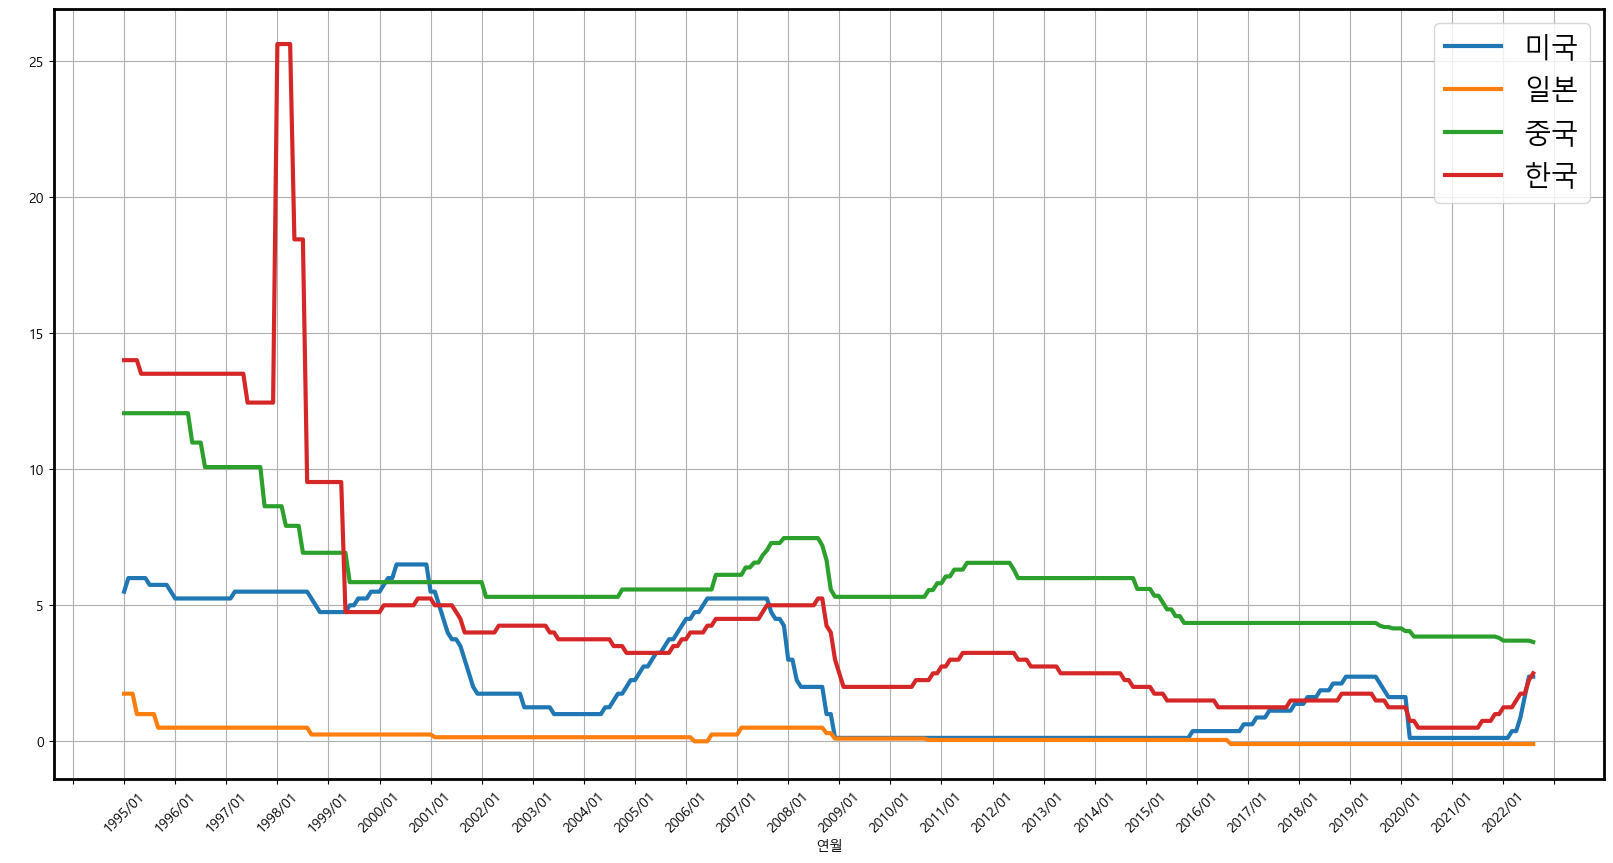

In [17]:
from matplotlib.ticker import MultipleLocator, IndexLocator, FuncFormatter
from matplotlib.dates import MonthLocator, DateFormatter

fig, ax = plt.subplots()
ax.set_ylabel(' ')

sns.lineplot(df_usa, x='연월', y='미국_금리(%)', errorbar=None, legend=True, ax=ax)
sns.lineplot(df_japan, x='연월', y='일본_금리(%)', errorbar=None, legend=True, ax=ax)
sns.lineplot(df_china, x='연월', y='중국_금리(%)', errorbar=None, legend=True, ax=ax)
sns.lineplot(df_korea, x='연월', y='한국_금리(%)', errorbar=None, legend=True, ax=ax)

plt.legend(['미국', '일본', '중국', '한국'], fontsize=20)
ax.xaxis.set_major_locator(MultipleLocator(12))      
plt.xticks(rotation=45)
plt.rcParams["axes.grid"] = False
plt.show()

## 2. 고(高)인플레이션
#### 2020년 이후 미국의 물가가 고(高)인플레이션 현상을 보이고 있음
#### 원인 1) 코로나19 위기 대응책인 양적완화
#### 원인 2) 우크라이나 전쟁으로 인한 유가 상승

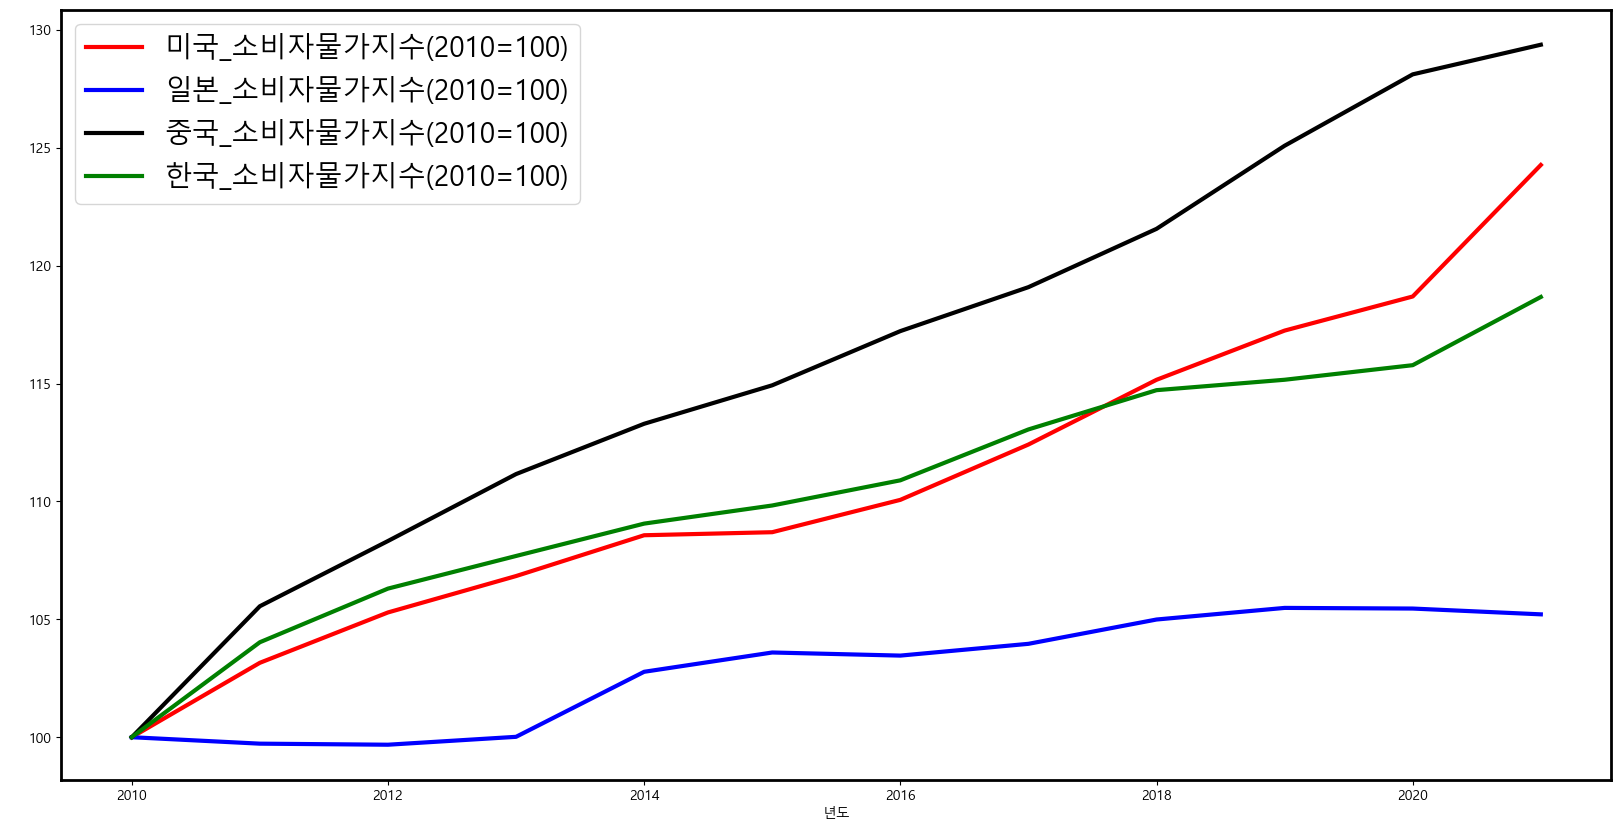

In [18]:
# 전세계 최근 인플레이션 현황 (소비자물가지수(2010기준)) : 2020년 이후 미국, 한국 가파르게 상승 중

df_inf = data.iloc[180:324, :]
df_inf.reset_index(drop=True, inplace=True)

fig, axe = plt.subplots()
axe.set_ylabel(' ')

sns.lineplot(df_inf, x='년도', y='미국_소비자물가지수(2010=100)', errorbar=None, legend=True, color='r')
sns.lineplot(df_inf, x='년도', y='일본_소비자물가지수(2010=100)', errorbar=None, legend=True, color='b')
sns.lineplot(df_inf, x='년도', y='중국_소비자물가지수(2010=100)', errorbar=None, legend=True, color='k')
sns.lineplot(df_inf, x='년도', y='한국_소비자물가지수(2010=100)', errorbar=None, legend=True, color='g')
plt.legend(['미국_소비자물가지수(2010=100)', '일본_소비자물가지수(2010=100)', '중국_소비자물가지수(2010=100)', '한국_소비자물가지수(2010=100)'], fontsize=20, loc='upper left')
plt.show()

## 3. 대응책 : 금리인상
#### 미국 중앙은행 연방준비제도(Fed)의 기준금리 인상 : 제롬 파월 연준 의장이 2022년 9월 21일 기자회견을 열고 기준금리 0.75%p 인상을 발표함
#### 연준은 이날 금리를 3~3.25% 범위로 상향 조정하며, 앞으로도 금리 인상이 뒤따를 것을 시사함

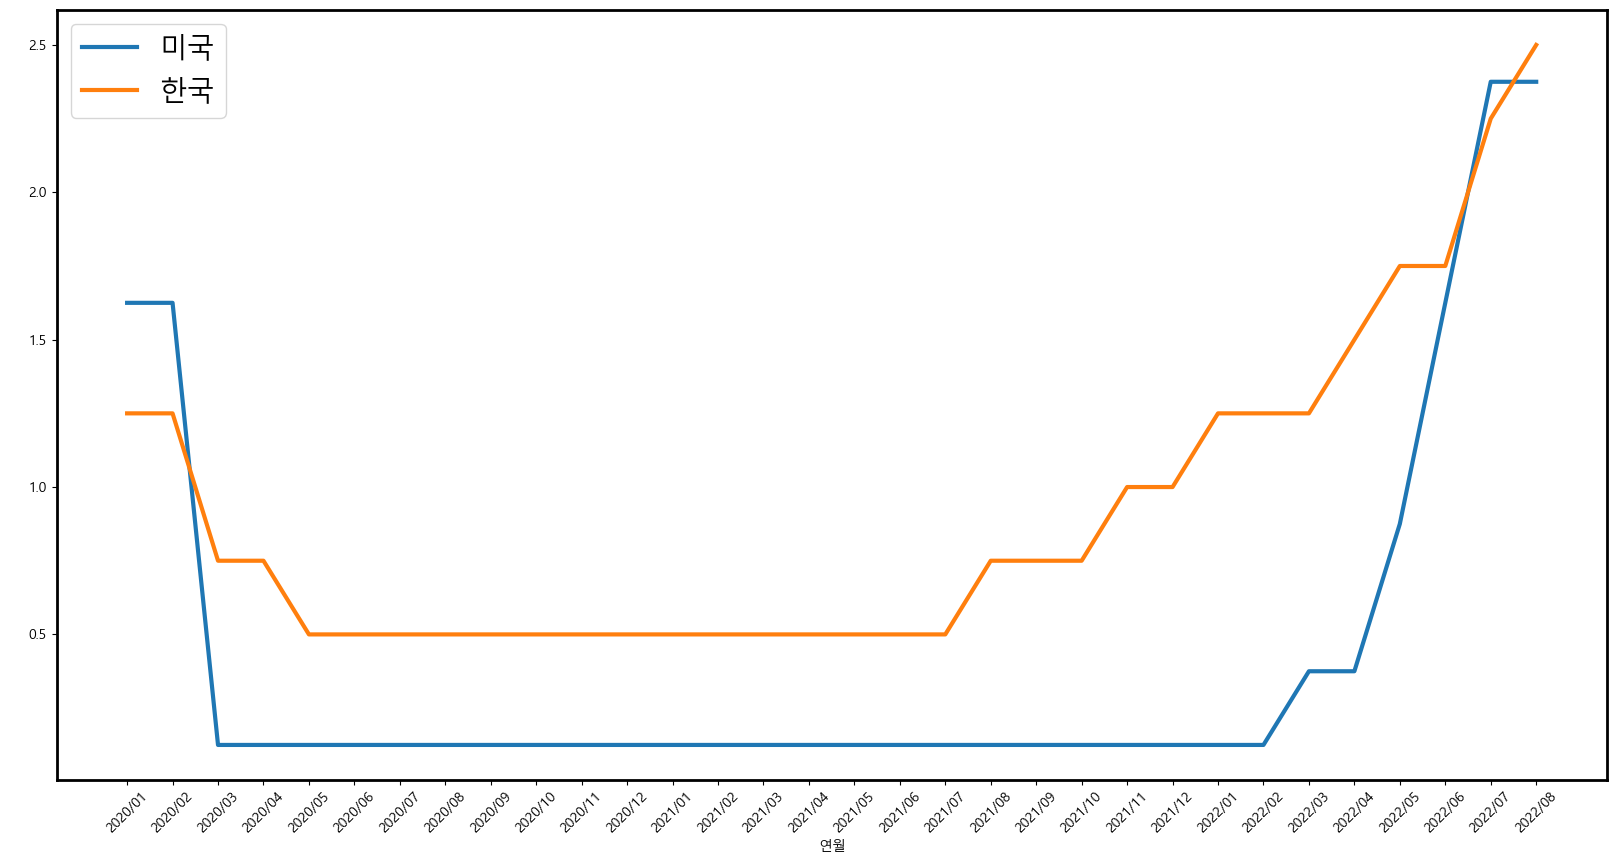

In [19]:
# 2020년 ~ 현재 (미국금리)
df_uint = df_usa.iloc[300:, :]
df_uint.reset_index(drop=True, inplace=True)

# 2020년 ~ 현재 (한국금리)
df_kint = df_korea.iloc[300:, :]
df_kint.reset_index(drop=True, inplace=True)

fig, axe = plt.subplots()
axe.set_ylabel(' ')

sns.lineplot(df_uint, x='연월', y='미국_금리(%)', errorbar=None, legend=True)
sns.lineplot(df_kint, x='연월', y='한국_금리(%)', errorbar=None, legend=True)
plt.xticks(rotation=45)
plt.legend(['미국', '한국'], fontsize=20)
plt.show()

## 4. 환율상승
#### 미국의 가파른 금리 인상의 영향으로 한국도 이에 맞춰 금리를 인상시키고 있음
#### 그러나 한-미 기준금리에 차이가 벌어지면서 외화가 미국으로 빠져나갔고 이에 따라 환율이 가파르게 상승
#### 일반적으로 환율의 상승은 수출을 증가시키지만 한국과 같은 대외의존적 개방경제에서는 자본재 수입비용 증가 등을 통해 투자를 위축시킬 수 있음
#### 실제로 원달러 환율이 크게 오른 시기인 1997년, 2008년, 2022년은 경제가 침체되는 시기와 일치함
#### 현재 한국의 경상수지는 적자를 기록하고 있다.

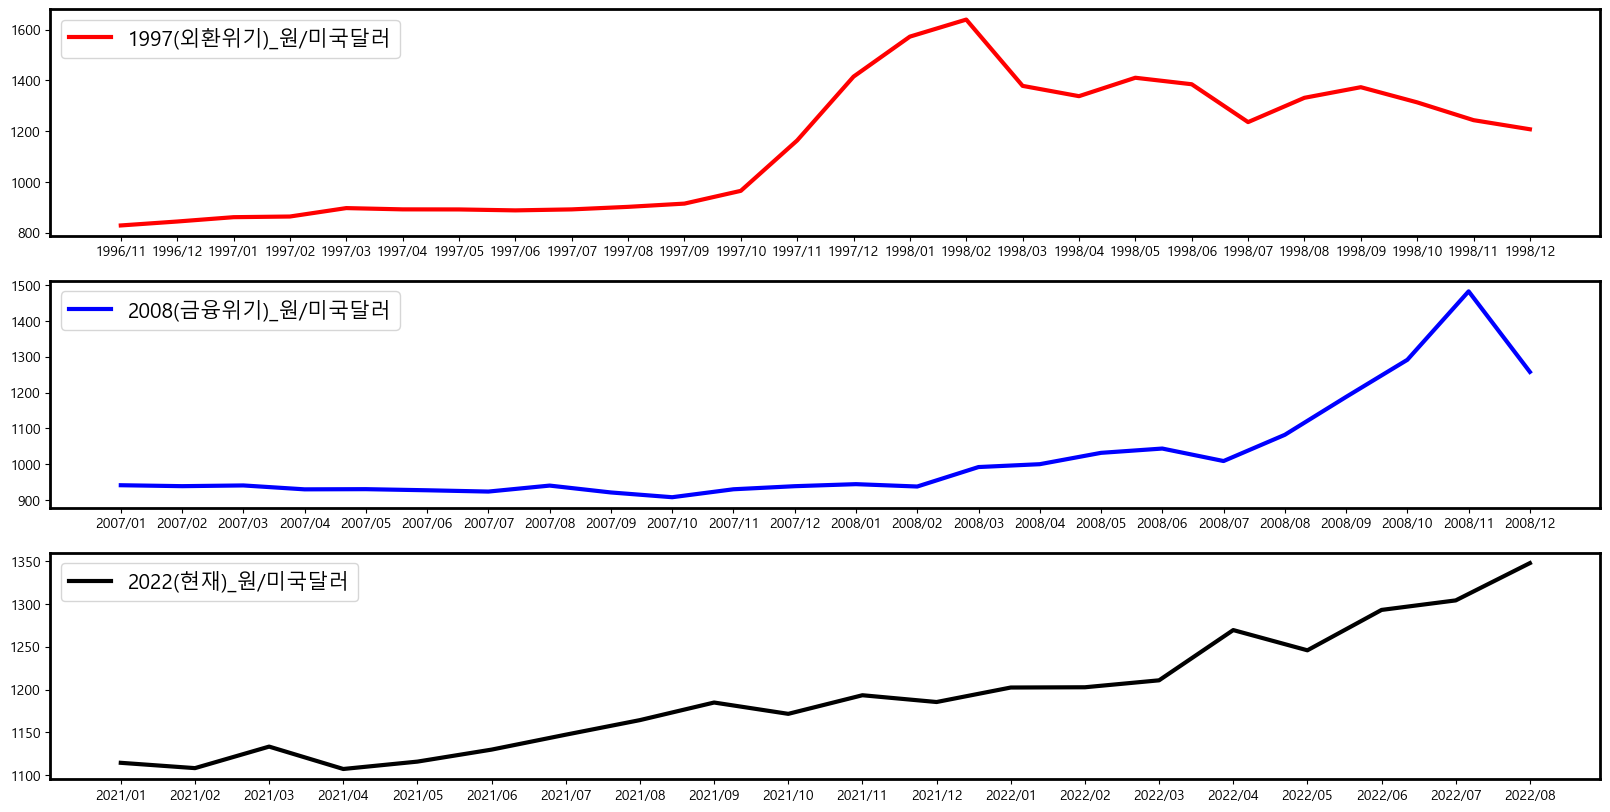

In [20]:
# 1997년 외환위기
IMF_data = data.iloc[22:48, :]
IMF_data.reset_index(drop=True, inplace=True)

# 2008년 금융위기
global_data = df_korea.iloc[144:168, :]
global_data.reset_index(drop=True, inplace=True)

# 2022년 현재
ty_data = data.iloc[312:, :]
ty_data.reset_index(drop=True, inplace=True)

x1 = IMF_data['연월']
y1 = IMF_data['원/미국달러(매매기준율)']
x2 = global_data['연월']
y2 = global_data['원/미국달러(매매기준율)']
x3 = ty_data['연월']
y3 = ty_data['원/미국달러(매매기준율)']
 
fig, ax = plt.subplots(3, 1)
ax[0].plot(x1,y1,color='r',label='1997(외환위기)_원/미국달러')
ax[1].plot(x2,y2,color='b',label='2008(금융위기)_원/미국달러')
ax[2].plot(x3,y3,color='k',label='2022(현재)_원/미국달러')

ax[0].legend(loc='upper left', fontsize=15)
ax[1].legend(loc='upper left', fontsize=15)
ax[2].legend(loc='upper left', fontsize=15)
plt.show()

## 5. 경상수지[Current account balance]
#### 경상수지란 외국과 물건(재화)이나 서비스(용역) 등을 거래한 결과를 종합한 것으로, 외국과 실행한 거래 결과 벌어들인 수입에서 지출을 차감한 금액

### 1) 외환위기(1997)

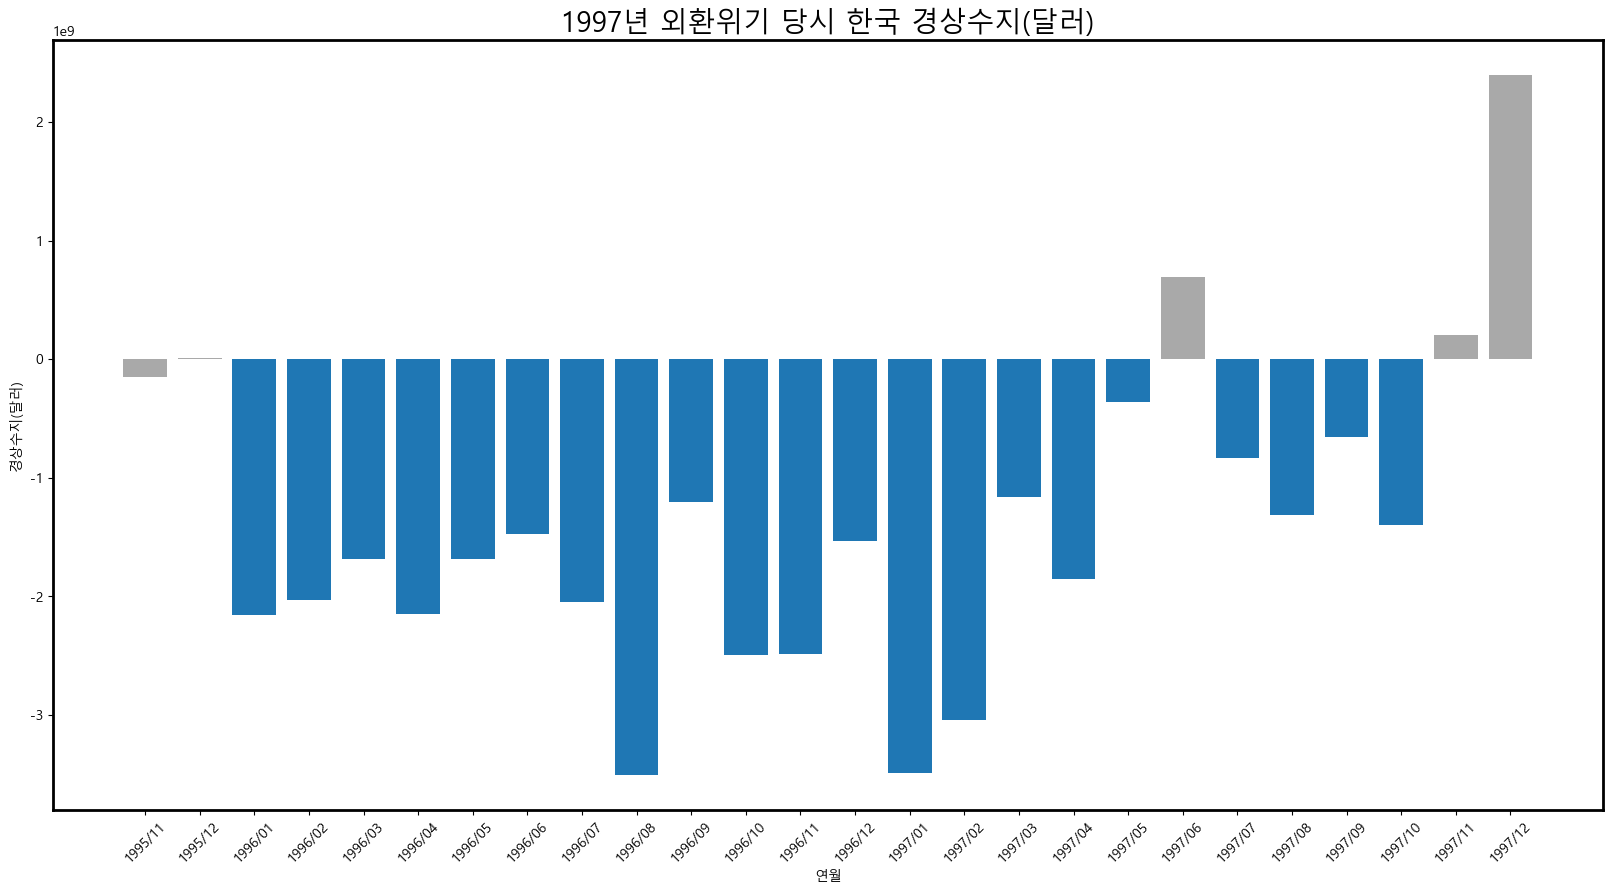

In [21]:
# 데이터
x_category1 = IMF_k['연월']
y_category1 = IMF_k['경상수지(달러)']

# 시각화
plt.figure(figsize=(20,10))
colors = ['darkgrey','darkgrey','tab:blue','tab:blue','tab:blue','tab:blue','tab:blue','tab:blue','tab:blue','tab:blue','tab:blue','tab:blue','tab:blue','tab:blue','tab:blue','tab:blue','tab:blue','tab:blue','tab:blue','darkgrey','tab:blue','tab:blue','tab:blue','tab:blue','darkgrey','darkgrey']
xtick_label_position = list(range(len(x_category1))) # x축 눈금 라벨이 표시될 x좌표
plt.xticks(xtick_label_position, x_category1, rotation=45) # x축 눈금 라벨 출력

# 바 차트 출력, 막대 색을 각각 지정한 색으로 설정
plt.bar(xtick_label_position, y_category1, color=colors)
 
plt.title('1997년 외환위기 당시 한국 경상수지(달러)', fontsize=20)
plt.xlabel('연월')
plt.ylabel('경상수지(달러)')
plt.show()

'외환위기'라는 타이틀을 달고 IMF 차관을 받은 것은 1997년 11월이었으나, 이미 1996년의 경상적자는 '사상 최대'였다. 11월에는 외환보유액이 20억 달러밖에 남지 않았다. 정부는 결국 1997년 12월3일 국제통화기금(IMF)에 구제 금융을 요청했다. IMF는 구제 금융을 제공하는 대신 자본시장을 전면 개방하고 환율 변동폭을 확대하라고 요구했다.

1997년 한국의 외환위기는 그 해 아시아 통화위기의 연장선상에서 발생했다. 아시아 국가들에 대한 위기 경고는 1년전부터 나오기 시작했다.

1996년 하반기에 들어가면서 동아시아 국가의 상반기 무역수지가 악화하기 시작했다. 미국과 유럽에 있는 아시아 전문가들은 한국, 홍콩 등 아시아 호랑이들에 대해 경기침체의 우려를 보냈다. 전문가들은 아시아 국가들의 1996년도 성장률이 당초 예상했던 것보다 둔화될 것으로 전망치를 조정했다. 세계 경제의 견인차 역할을 했던 아시아가 침체할 조짐을 보이고 있었던 것이다.

서구의 아시아 전문가들은 높은 임금 상승률과 인플레이션을 잠재적 복병으로 감지했지만, 다음 해 아시아 경제가 급격한 침체에 빠질 것을 예측하지는 못했다. 수출 성장률이 높고, GDP 증가율도 여전히 좋게 나왔기 때문이다.

### 2) 금융위기(2008)

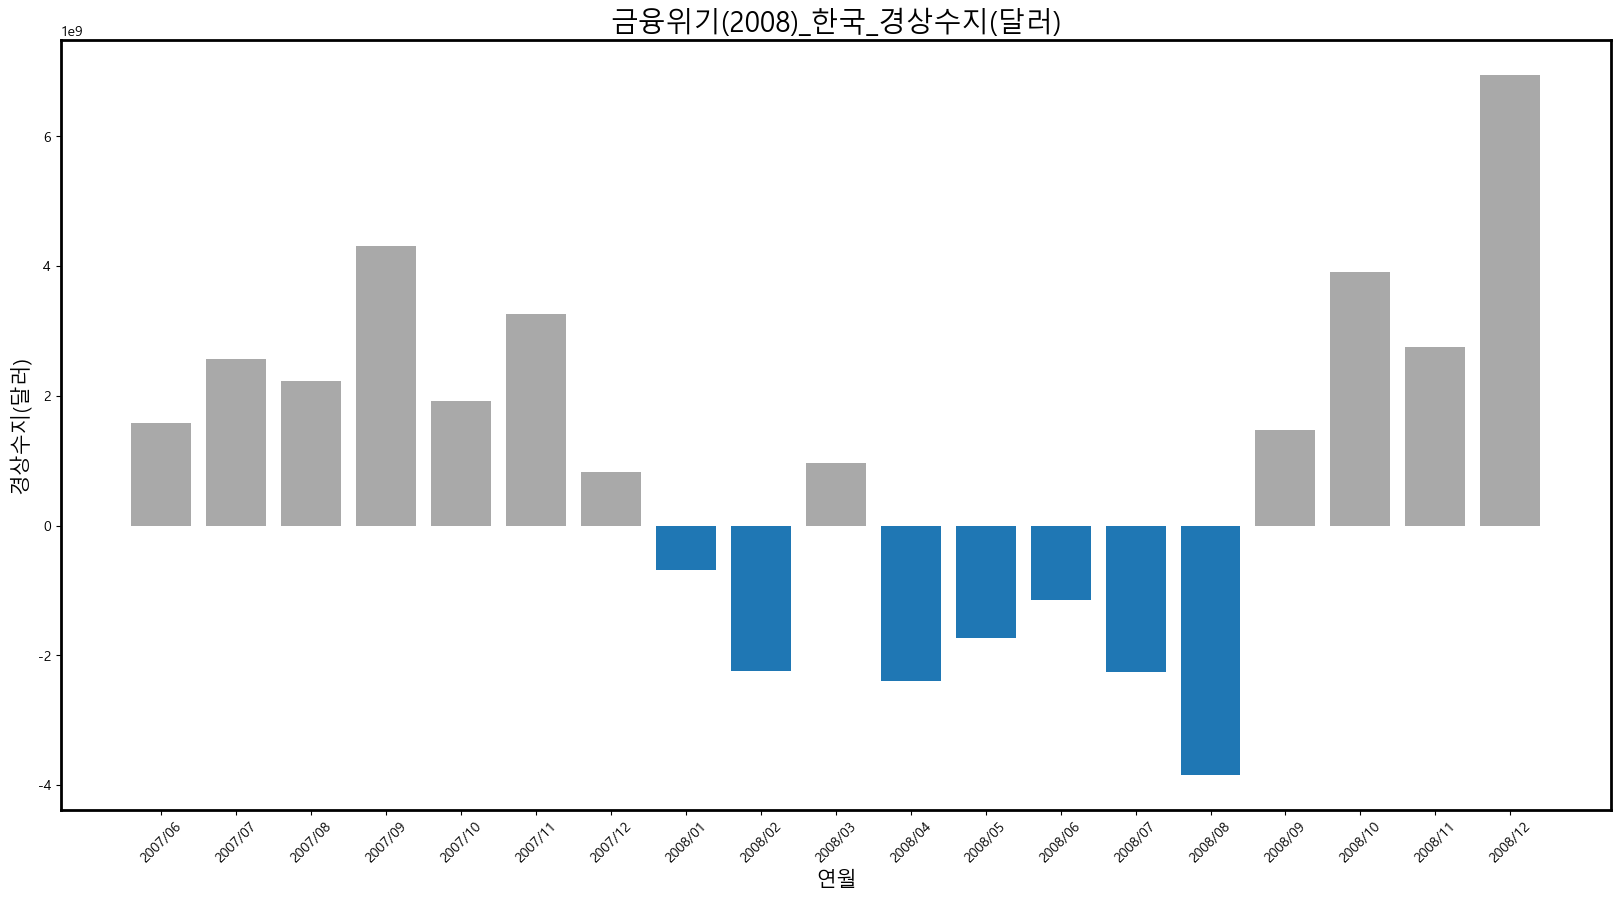

In [22]:
# 데이터
global_dep_new = df_korea.iloc[149:168, :]
global_dep_new.reset_index(drop=True, inplace=True)
x_category2 = global_dep_new['연월']
y_category2 = global_dep_new['경상수지(달러)']

# 시각화
plt.figure(figsize=(20,10))
colors = ['darkgrey','darkgrey','darkgrey','darkgrey','darkgrey','darkgrey','darkgrey','tab:blue','tab:blue','darkgrey','tab:blue','tab:blue','tab:blue','tab:blue','tab:blue','darkgrey','darkgrey','darkgrey','darkgrey']  ## 색상 지정
xtick_label_position = list(range(len(x_category2)))
plt.xticks(xtick_label_position, x_category2, rotation=45)

# 바 차트 출력, 막대 색을 각각 지정한 색으로 설정
plt.bar(xtick_label_position, y_category2, color=colors)

plt.title('금융위기(2008)_한국_경상수지(달러)', fontsize=20)
plt.xlabel('연월', fontsize=15)
plt.ylabel('경상수지(달러)', fontsize=15)
plt.show()

### 3) 코로나(2020)

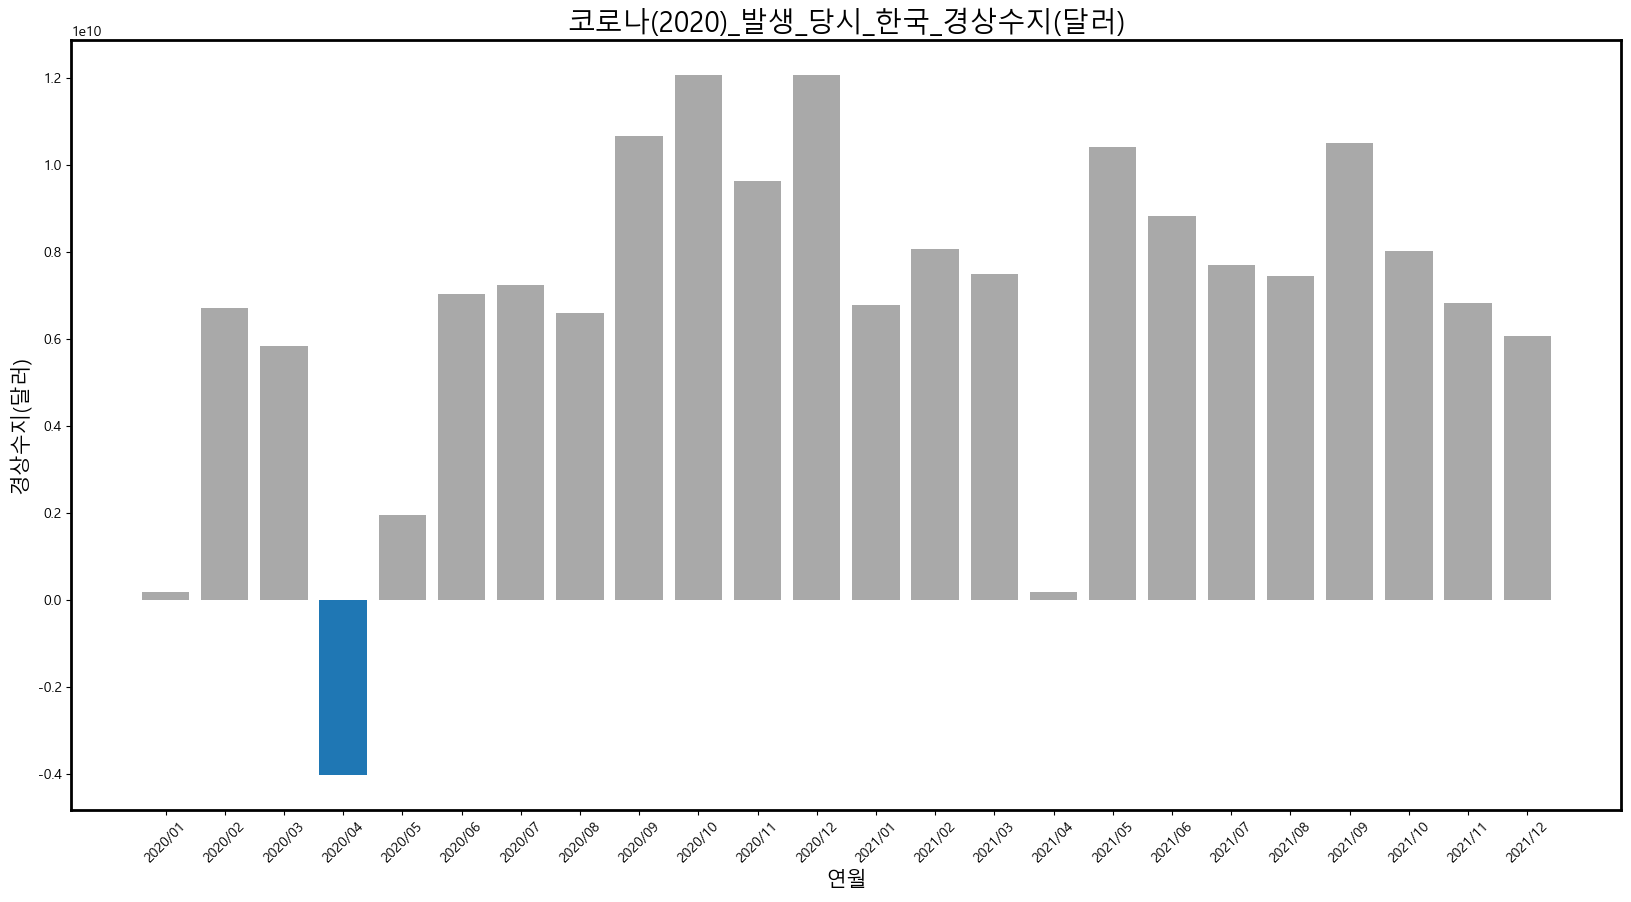

In [23]:
# 데이터
x_category3 = ly['연월']
y_category3 = ly['경상수지(달러)']

# 시각화
plt.figure(figsize=(20,10))
colors = ['darkgrey','darkgrey','darkgrey','tab:blue','darkgrey','darkgrey','darkgrey','darkgrey','darkgrey','darkgrey','darkgrey','darkgrey','darkgrey','darkgrey','darkgrey','darkgrey','darkgrey','darkgrey','darkgrey','darkgrey','darkgrey','darkgrey','darkgrey','darkgrey']  ## 색상 지정
xtick_label_position = list(range(len(x_category3)))
plt.xticks(xtick_label_position, x_category3, rotation=45)

# 바 차트 출력, 막대 색을 각각 지정한 색으로 설정
plt.bar(xtick_label_position, y_category3, color=colors)
 
plt.title('코로나(2020)_발생_당시_한국_경상수지(달러)', fontsize=20)
plt.xlabel('연월', fontsize=15)
plt.ylabel('경상수지(달러)', fontsize=15)
plt.show()

### 4) 현재(2022)

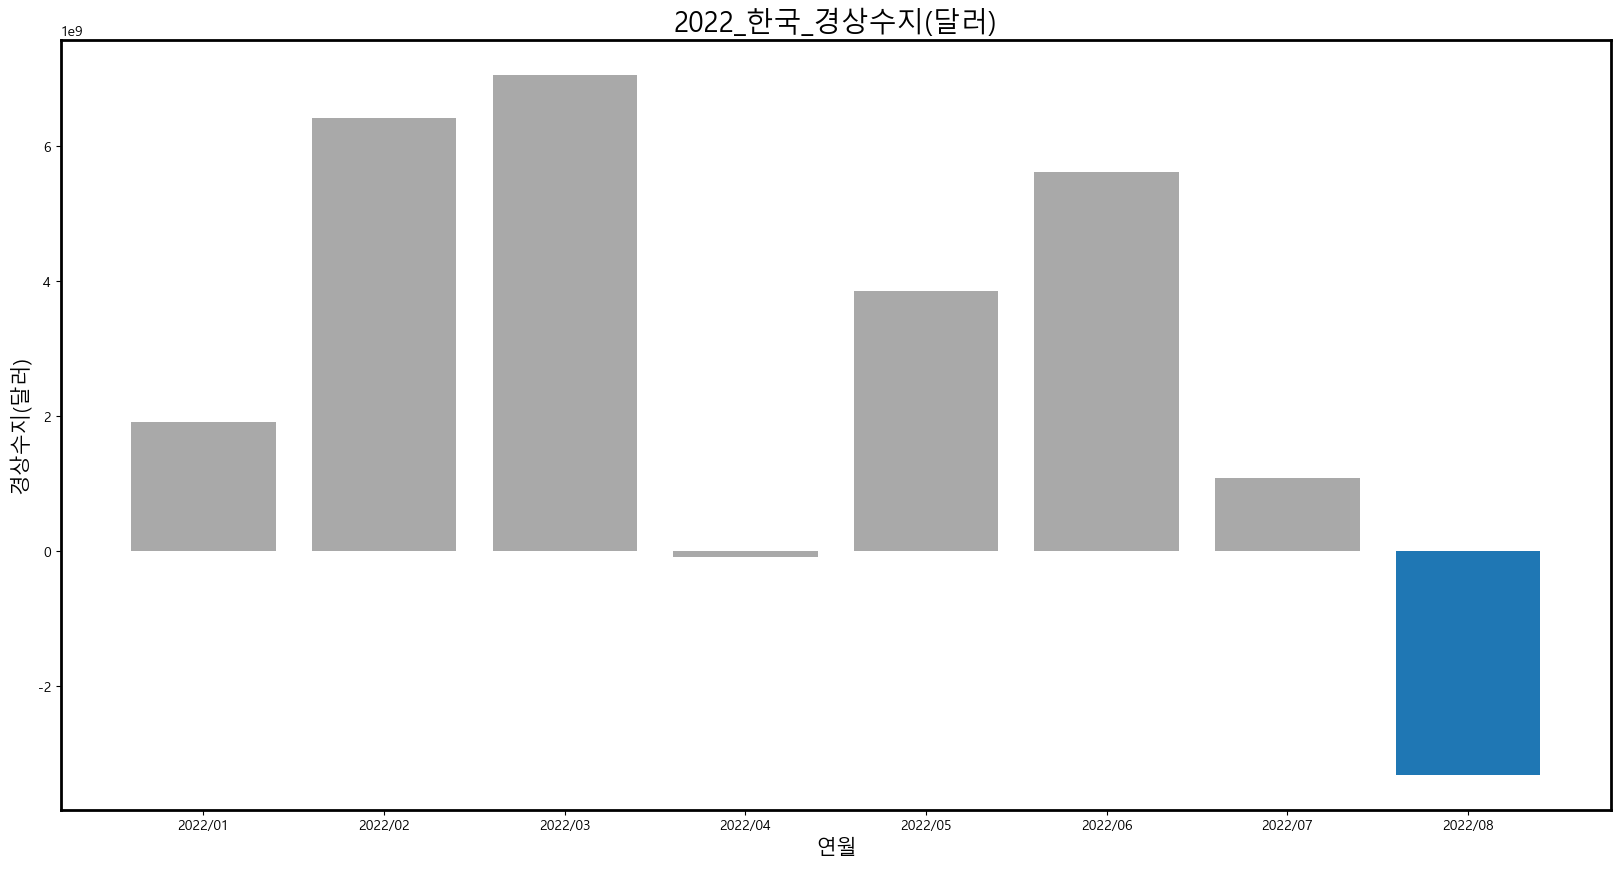

In [24]:
# 데이터
x_category4 = ty['연월']
y_category4 = ty['경상수지(달러)']

# 시각화
plt.figure(figsize=(20,10))
colors = ['darkgrey','darkgrey','darkgrey','darkgrey','darkgrey','darkgrey','darkgrey','tab:blue']
xtick_label_position = list(range(len(x_category4)))
plt.xticks(xtick_label_position, x_category4)

# 바 차트 출력, 막대 색을 각각 지정한 색으로 설정
plt.bar(xtick_label_position, y_category4, color=colors)
 
plt.title('2022_한국_경상수지(달러)', fontsize=20)
plt.xlabel('연월', fontsize=15)
plt.ylabel('경상수지(달러)', fontsize=15)
plt.show()

## 6. 한국 외환보유액

### - 외환위기(1997), 금융위기(2008), 현재(2022)

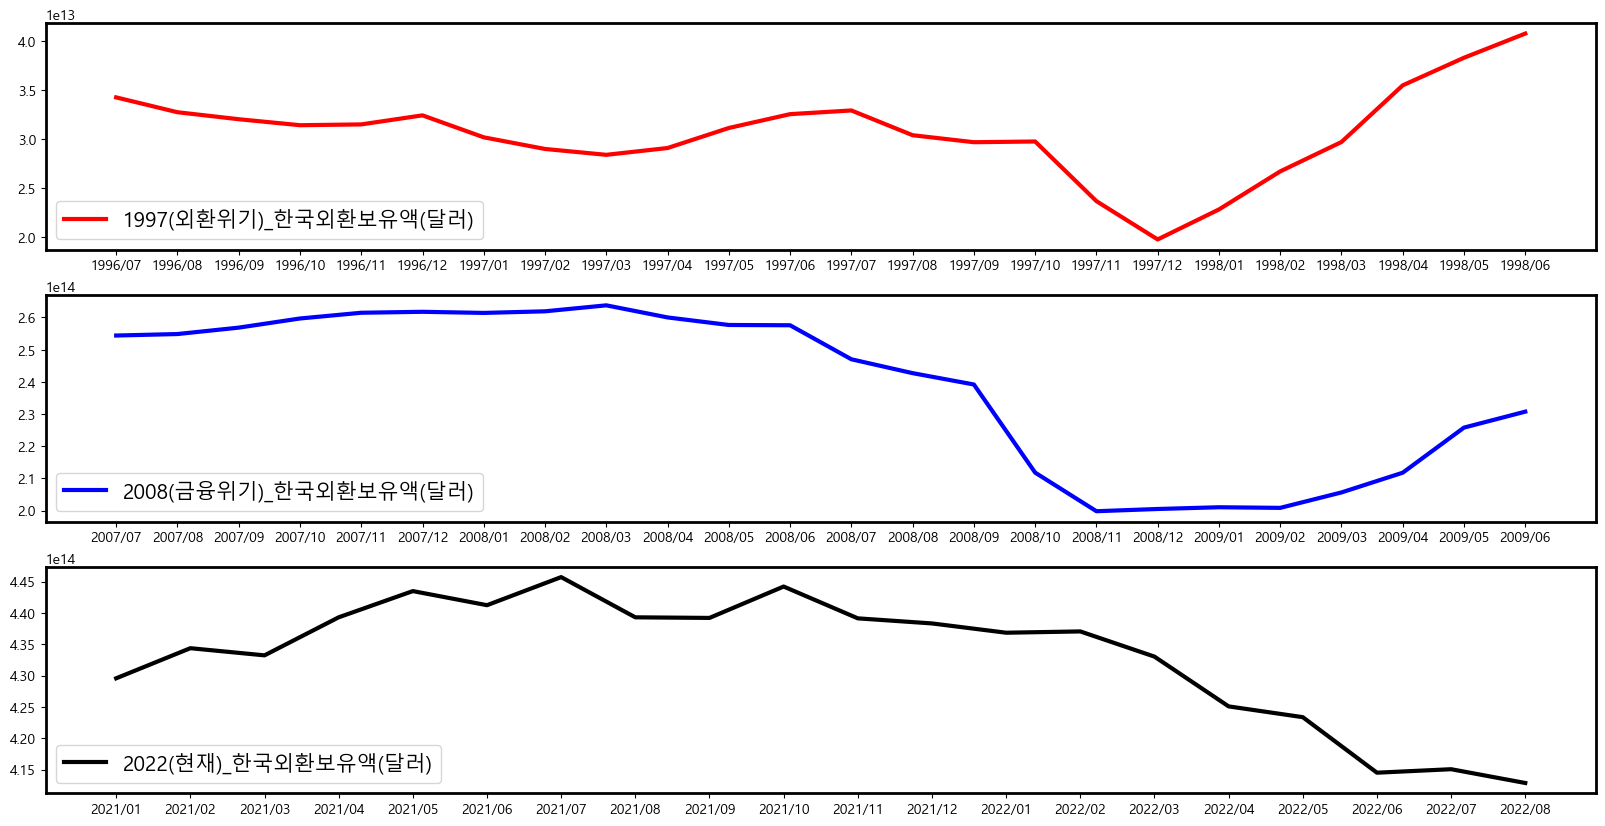

In [25]:
# 1997년 외환위기
IMF_data = data.iloc[18:42, :]
IMF_data.reset_index(drop=True, inplace=True)

# 2008년 금융위기
global_data = df_korea.iloc[150:174, :]
global_data.reset_index(drop=True, inplace=True)

# 2022년 현재
ty_data = data.iloc[312:, :]
ty_data.reset_index(drop=True, inplace=True)

x1 = IMF_data['연월']          
y1 = IMF_data['한국_외환보유액(달러)']
x2 = global_data['연월']
y2 = global_data['한국_외환보유액(달러)']
x3 = ty_data['연월']
y3 = ty_data['한국_외환보유액(달러)']
 
fig, ax = plt.subplots(3, 1)
ax[0].plot(x1,y1,color='r', label='1997(외환위기)_한국외환보유액(달러)')
ax[1].plot(x2,y2,color='b', label='2008(금융위기)_한국외환보유액(달러)')
ax[2].plot(x3,y3,color='k', label='2022(현재)_한국외환보유액(달러)')

ax[0].legend(loc='lower left', fontsize=15)
ax[1].legend(loc='lower left', fontsize=15)
ax[2].legend(loc='lower left', fontsize=15)
plt.show()

### → 세 시기 모두 외환보유액이 감소함을 알 수 있음

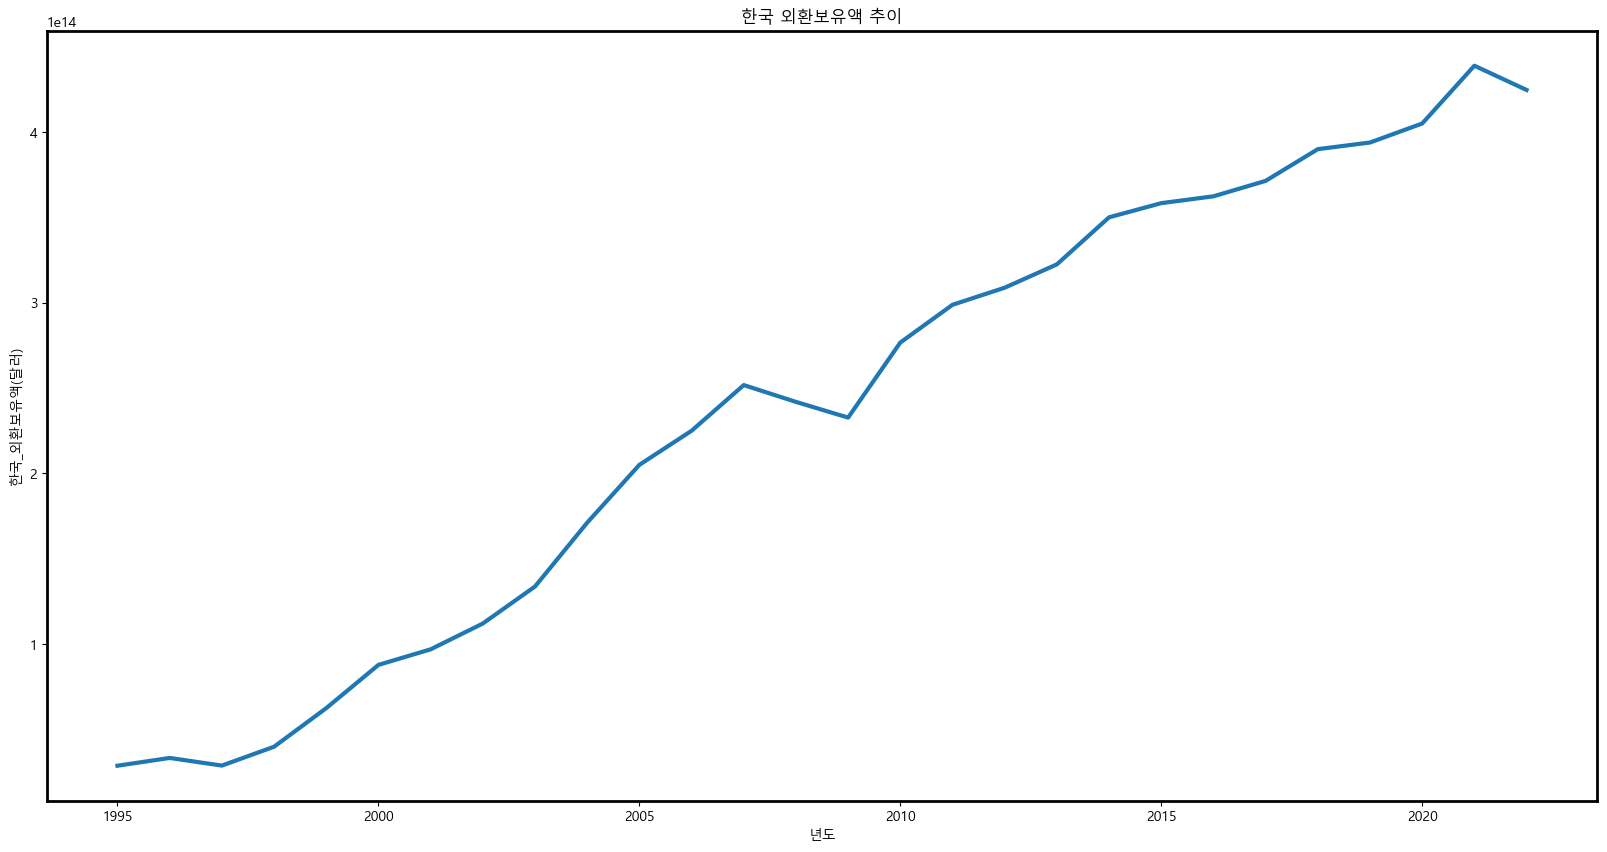

In [26]:
plt.figure(figsize=(20, 10))
sns.lineplot(df_korea, x='년도', y='한국_외환보유액(달러)', errorbar=None, legend=True)
plt.title('한국 외환보유액 추이')
plt.show()

### → 실제로 지난 30년간 한국의 외환보유액이 큰 추세를 보인 것은 1997년, 2008년, 2022년
### → 경제가 위기였던 시기라고 평가를 받았거나, 앞으로 위기일 것이라고 예측되는 시기와 일치함
### → 환율 지표와 같은 이유로 외환보유액 지표만으로는 외환위기와 금융위기의 차이를 구분할 수 없음

## 추가 지표) 단기외채/외환보유액

In [27]:
df_fc_ratio = data[['연월','년도','단기외채/외환보유액']]
df_fc_ratio.head()

,연월,년도,단기외채/외환보유액
0,1995/01,1995,1.790688
1,1995/02,1995,1.782530
2,1995/03,1995,1.771330
3,1995/04,1995,1.995662
4,1995/05,1995,1.958120


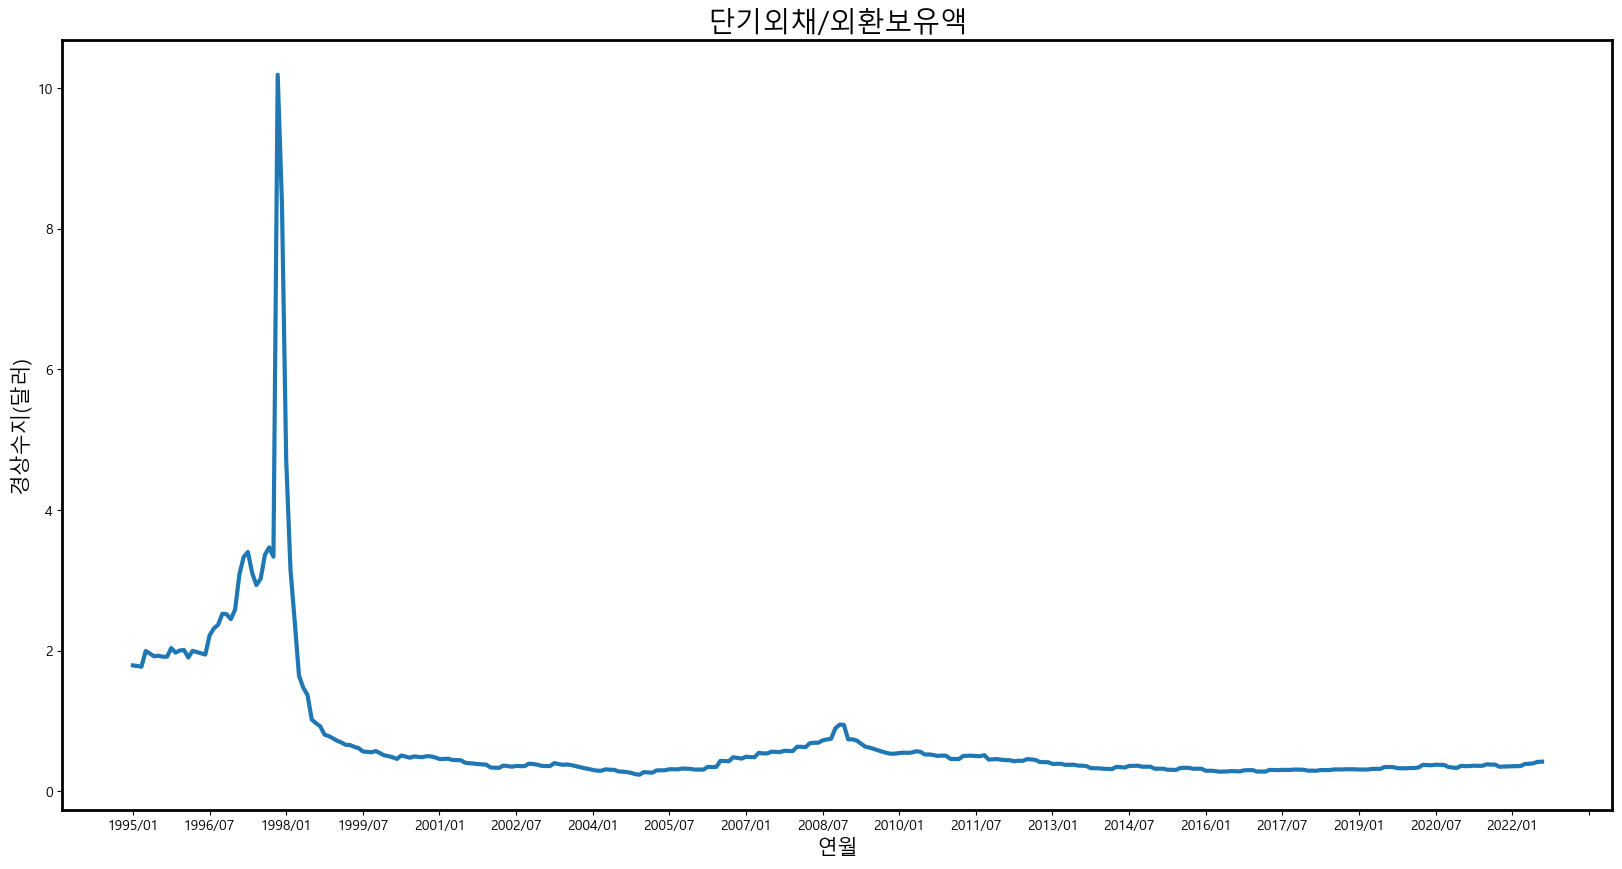

In [28]:
fig, ax = plt.subplots()

sns.lineplot(df_fc_ratio, x='연월', y='단기외채/외환보유액', errorbar=None, legend=True)
ax.xaxis.set_major_locator(MultipleLocator(18))

plt.title('단기외채/외환보유액', fontsize=20)
plt.xlabel('연월', fontsize=15)
plt.ylabel('경상수지(달러)', fontsize=15)
plt.show()

### → 시사하는 바 작성

## 7. 미국의 장단기 금리차 역전
#### 장단기 금리 역전 : 장기금리가 단기금리보다 낮아지는 현상
#### 주요 금융시장 및 경제지표 중에서 경기침체에 대한 예측력이 가장 정확한 지표 중 하나
#### 실제로 미국에서는 1960년 이후에 발생한 모든 경기침체에 앞서 장단기 금리가 역전된 바 있음
#### Bauer and Mertens(2018)에 따르면 1950년 이후 모든 경기침체기에 장단기 금리(10년 금리 - 1년 금리) 역전이 '6개월에서 24개월가량 선행'한 것으로 분석

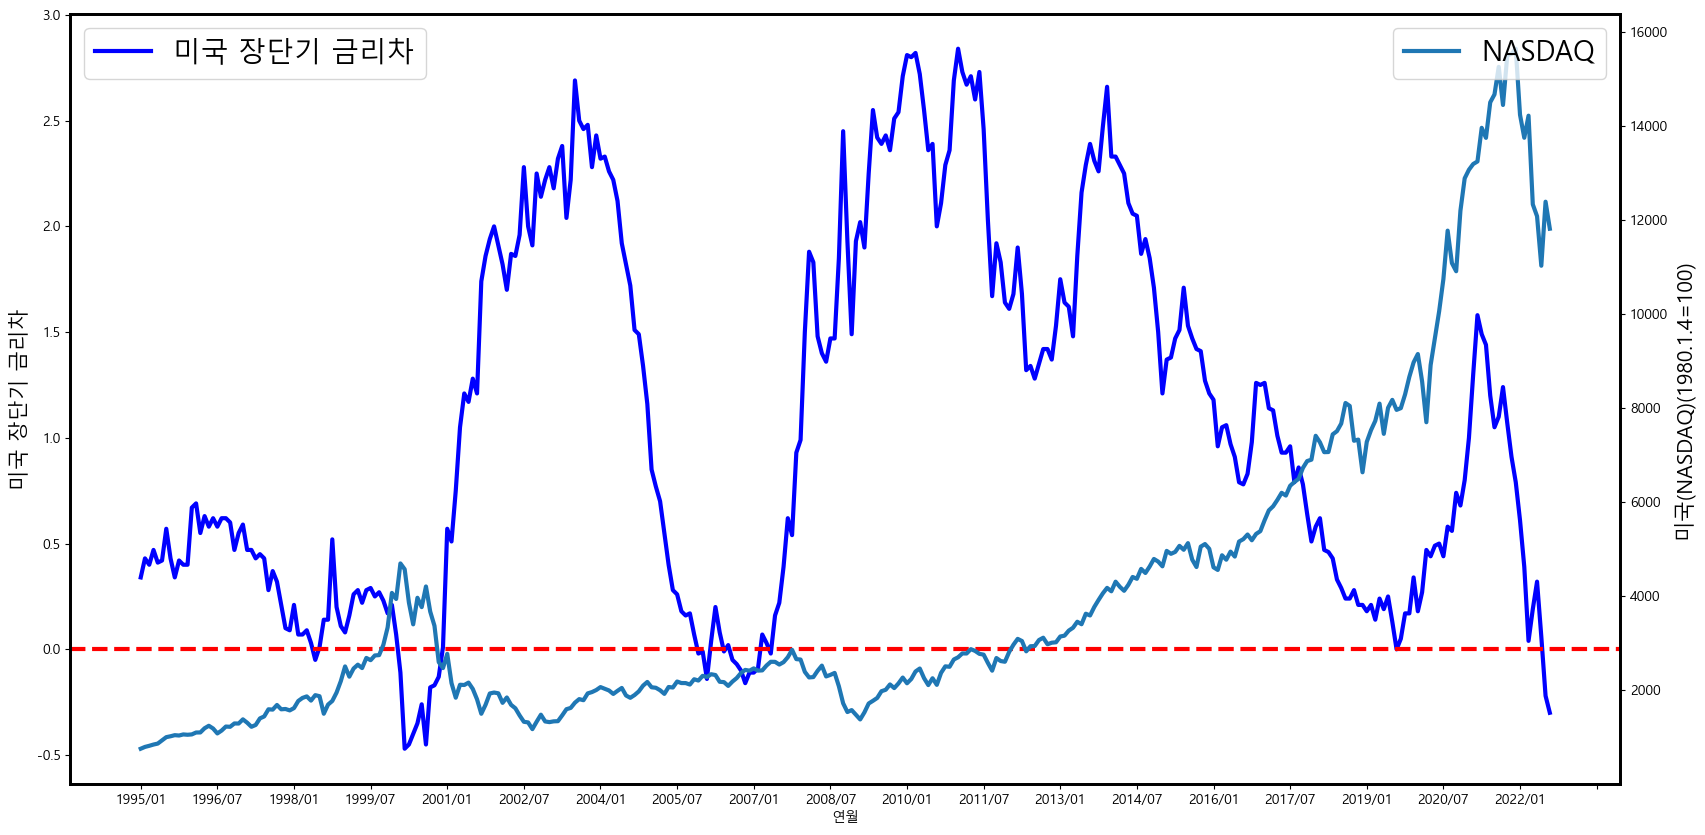

In [29]:
fig, axe1 = plt.subplots()
axe2 = axe1.twinx()

c1 = sns.lineplot(ax = axe1, data = df_usa, x = '연월', y = '미국장단기(국채)금리차', errorbar=None, legend=True, color='b').axhline(0, ls='--', color='r')
c2 = sns.lineplot(ax = axe2, data = df_usa, x = '연월', y = '미국(NASDAQ)(1980.1.4=100)', errorbar=None, legend=True, color='tab:blue')

axe1.legend(['미국 장단기 금리차'], loc = 'upper left', fontsize=20)
axe2.legend(['NASDAQ'], loc = 'upper right', fontsize=20)

axe1.xaxis.set_major_locator(MultipleLocator(18))

axe1.set_ylabel('미국 장단기 금리차', fontsize=15)
axe2.set_ylabel('미국(NASDAQ)(1980.1.4=100)', fontsize=15)
plt.rcParams["axes.grid"] = False
plt.show()

## 8. 상관계수

In [30]:
df_rel = data.iloc[:, [2, 6, 10, 20, 25, 29]]
df_rel.corr()

,미국_금리(%),원/미국달러(매매기준율),미국(NASDAQ)(1980.1.4=100),한국_외환보유액(달러),경상수지(달러),미국장단기(국채)금리차
미국_금리(%),1.000000,-0.369240,-0.401737,-0.744106,-0.541237,-0.706271
원/미국달러(매매기준율),-0.369240,1.000000,0.195890,0.155932,0.287555,0.223218
미국(NASDAQ)(1980.1.4=100),-0.401737,0.195890,1.000000,0.745406,0.530457,-0.201528
한국_외환보유액(달러),-0.744106,0.155932,0.745406,1.000000,0.645326,0.165409
경상수지(달러),-0.541237,0.287555,0.530457,0.645326,1.000000,0.090975
미국장단기(국채)금리차,-0.706271,0.223218,-0.201528,0.165409,0.090975,1.000000


### → 해당 지표를 선정한 이유가 필요함

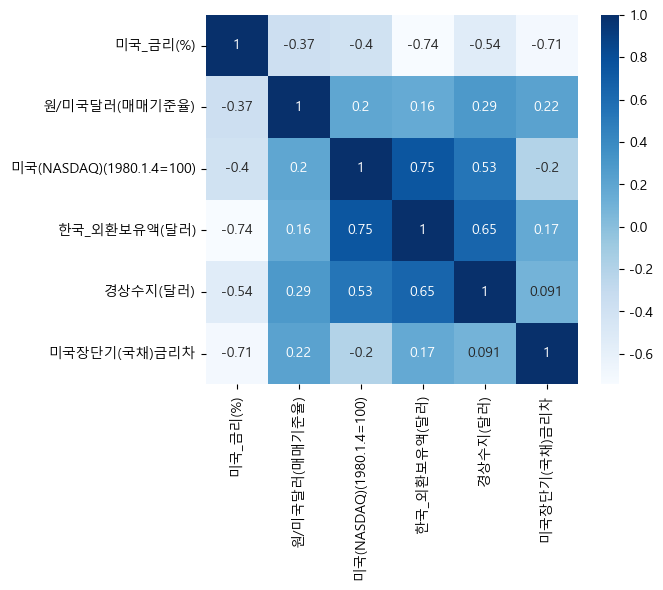

In [31]:
plt.figure(figsize=(6, 4.8))
sns.heatmap(df_rel.corr(), annot = True, cmap='Blues')
plt.show()

### → 0.75 (나스닥 ↔ 한국 외환보유액)
### → 0.65 (경상수지 ↔ 한국 외환보유액)
### → -0.74 (미국 금리 ↔ 한국 외환보유액)
### → -0.71 (미국 금리 ↔ 미국 장단기 금리차)
### → -0.54 (미국 금리 ↔ 경상수지)

### 외환위기 vs. 금융위기 차이 → 결론에 포함시켜서 작성
#### 세 지표 분석 외환위기(1997) // 금융위기(2008) 현재(2022):예측 - 일단 금융위기 쪽으로
#### 이거 가지고 회귀분석으로 연결 지을 것

## 9. 결론
#### 국가 경제에 대한 위기 예측력이 높은 지표
#### 1) 환율 : 급등 중
#### 2) 경상수지 : 마이너스
#### 3) 외환보유액 : 확인 필요 - 통화스왑 규모 확인
#### 4) 미국장단기금리차 역전 : 현재 역전 중 (1996이후 모든 경제불황에 선행)
#### → 지금까지 분석한 자료 + 시각화 통해서 결론 내고, 회귀분석으로 스토리텔링 연결!!!!

# Ⅳ. 회귀분석

### 기존의 df에 새로운 컬럼을 추가
### → 회귀분석을 위해서는 정답이 되는 y 컬럼이 필요함
### → 현재의 경제적 상황을 판단하는 데 필요한 지표는 여러가지가 있음
### → 그 중에서 하나의 지표만으로는 정확한 경제적 상황을 판단할 수 없음
### → 따라서 새로운 컬럼을 생성하여 지난 30년의 기간의 리스크 수준을 세 종류로 분류하여 회귀분석을 실시
### → 리스크 수준(y)을 1997년 외환위기는 1, 2008년 금융위기는 2, 나머지 대부분의 기간은 0으로 설정
### → 회귀분석 시작

In [32]:
# '리스크 분류' 컬럼 추가
data['리스크_분류'] = 0
data

,연월,년도,미국_금리(%),일본_금리(%),중국_금리(%),한국_금리(%),원/미국달러(매매기준율),원/위안(매매기준율),원/일본엔(100엔),달러_인덱스,미국(NASDAQ)(1980.1.4=100),일본(NIKKEI)(1980.1.4=100),중국(SHCOMP)(1980.1.4=100),한국(KOSPI)(1980.1.4=100),미국_소비자물가지수(2010=100),일본_소비자물가지수(2010=100),중국_소비자물가지수(2010=100),한국_소비자물가지수(2010=100),일본_외환보유액(달러),중국_외환보유액(달러),한국_외환보유액(달러),미국_경제성장률(%),일본_경제성장률(%),중국_경제성장률(%),한국_경제성장률(%),경상수지(달러),미국_실업률(%),일본_실업률(%),한국_실업률(%),미국장단기(국채)금리차,외채비율(%),미국_1인당_국민소득(달러),일본_1인당_국민소득(달러),중국_1인당_국민소득(달러),한국_1인당_국민소득(달러),무역수지(달러),총외채(달러),단기외채(달러),단기외채/외환보유액,단기외채/총외채,리스크_분류
0,1995/01,1995,5.500,1.75,12.06,14.01,786.7,93.548540,791.65,88.030,755.20,18649.82,562.59,925.56,68.93,101.33,71.41,58.87,183250000000,75377000000,25634400000000,2.7,2.6,11.0,9.6,-1209000000,5.6,3.0,2.1,0.34,0.470935,29040,42570,540,11820,-1201000000,80800000000,36200000000,1.790688,0.448020,0
1,1995/02,1995,6.000,1.75,12.06,14.01,786.0,93.659190,809.47,85.920,793.74,17053.43,549.26,885.69,69.20,101.02,72.06,59.11,183250000000,75377000000,25752333000000,2.7,2.6,11.0,9.6,-1522000000,5.4,3.0,2.2,0.43,0.470935,29040,42570,540,11820,-1462000000,80800000000,36200000000,1.782530,0.448020,0
2,1995/03,1995,6.000,1.75,12.06,14.01,771.5,91.628691,862.25,82.080,817.21,16139.95,646.92,931.78,69.43,100.91,72.26,59.71,183250000000,75377000000,25878700000000,2.7,2.6,11.0,9.6,-1562000000,5.4,3.1,2.1,0.40,0.470935,29040,42570,540,11820,-1668000000,80800000000,36200000000,1.771330,0.448020,0
3,1995/04,1995,6.000,1.00,12.06,14.01,761.8,90.676071,904.21,81.920,843.98,16806.75,579.93,897.00,69.66,101.23,73.56,60.07,183250000000,75377000000,26551800000000,2.7,2.6,11.0,9.6,-748000000,5.8,3.1,2.0,0.47,0.470935,29040,42570,540,11820,-934000000,89200000000,41900000000,1.995662,0.469731,0
4,1995/05,1995,6.000,1.00,12.06,13.51,760.1,91.246764,913.58,82.670,864.58,15436.79,700.51,882.50,69.80,101.43,74.17,60.19,183250000000,75377000000,27068000000000,2.7,2.6,11.0,9.6,-959000000,5.6,3.0,2.1,0.41,0.470935,29040,42570,540,11820,-1171000000,89200000000,41900000000,1.958120,0.469731,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,2022/04,2022,0.375,-0.10,3.70,1.50,1269.4,192.030000,970.16,102.963,12334.64,26847.90,3047.06,2695.05,132.59,107.05,131.91,123.71,1322193000000,3119720000000,425076761000000,-0.6,0.9,-2.6,0.7,-79000000,3.6,2.5,2.7,0.19,0.419000,76027,39243,14096,34994,-2508000000,654100000000,174900000000,0.389274,0.267390,0
328,2022/05,2022,0.875,-0.10,3.70,1.75,1245.8,186.400000,975.61,101.766,12081.39,27279.80,3186.43,2685.90,134.05,107.37,131.65,124.53,1329651000000,3127780000000,423355152000000,-0.6,0.9,-2.6,0.7,3860000000,3.6,2.6,2.8,0.32,0.419000,76027,39243,14096,34994,-1614000000,654100000000,174900000000,0.390654,0.267390,0
329,2022/06,2022,1.625,-0.10,3.70,1.75,1292.9,192.750000,946.45,104.464,11028.74,26393.04,3398.62,2332.64,135.89,107.37,131.65,125.29,1311254000000,3071272000000,414491928000000,-0.6,0.9,-2.6,0.7,5610000000,3.6,2.6,2.9,0.06,0.419000,76027,39243,14096,34994,-2487000000,654100000000,174900000000,0.399061,0.267390,0
330,2022/07,2022,2.375,-0.10,3.70,2.25,1304.0,193.350000,970.53,105.779,12390.69,27801.64,3253.24,2451.50,135.87,107.89,132.29,125.90,1323034000000,3104071000000,415046922000000,-0.6,0.9,-2.6,0.7,1089000000,3.5,2.6,2.9,-0.22,0.419000,76027,39243,14096,34994,-4805000000,662000000000,183800000000,0.419056,0.277644,0


### - 1997년 외환위기 기간(1997.12 ~ 2001.8) → 리스크 분류 1 입력

In [33]:
data['리스크_분류'][35:80] = 1

### - 2008년 외환위기 기간(2007.4 ~ 2009.4) → 리스크 분류 2 입력

In [34]:
data['리스크_분류'][147:172] = 2

In [35]:
# 한국
df_regression = data.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 13, 20, 24, 25, 29, 30, 35, 37, 38, 40]]
df_regression

,연월,년도,미국_금리(%),일본_금리(%),중국_금리(%),한국_금리(%),원/미국달러(매매기준율),원/위안(매매기준율),원/일본엔(100엔),한국(KOSPI)(1980.1.4=100),한국_외환보유액(달러),한국_경제성장률(%),경상수지(달러),미국장단기(국채)금리차,외채비율(%),무역수지(달러),단기외채(달러),단기외채/외환보유액,리스크_분류
0,1995/01,1995,5.500,1.75,12.06,14.01,786.7,93.548540,791.65,925.56,25634400000000,9.6,-1209000000,0.34,0.470935,-1201000000,36200000000,1.790688,0
1,1995/02,1995,6.000,1.75,12.06,14.01,786.0,93.659190,809.47,885.69,25752333000000,9.6,-1522000000,0.43,0.470935,-1462000000,36200000000,1.782530,0
2,1995/03,1995,6.000,1.75,12.06,14.01,771.5,91.628691,862.25,931.78,25878700000000,9.6,-1562000000,0.40,0.470935,-1668000000,36200000000,1.771330,0
3,1995/04,1995,6.000,1.00,12.06,14.01,761.8,90.676071,904.21,897.00,26551800000000,9.6,-748000000,0.47,0.470935,-934000000,41900000000,1.995662,0
4,1995/05,1995,6.000,1.00,12.06,13.51,760.1,91.246764,913.58,882.50,27068000000000,9.6,-959000000,0.41,0.470935,-1171000000,41900000000,1.958120,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,2022/04,2022,0.375,-0.10,3.70,1.50,1269.4,192.030000,970.16,2695.05,425076761000000,0.7,-79000000,0.19,0.419000,-2508000000,174900000000,0.389274,0
328,2022/05,2022,0.875,-0.10,3.70,1.75,1245.8,186.400000,975.61,2685.90,423355152000000,0.7,3860000000,0.32,0.419000,-1614000000,174900000000,0.390654,0
329,2022/06,2022,1.625,-0.10,3.70,1.75,1292.9,192.750000,946.45,2332.64,414491928000000,0.7,5610000000,0.06,0.419000,-2487000000,174900000000,0.399061,0
330,2022/07,2022,2.375,-0.10,3.70,2.25,1304.0,193.350000,970.53,2451.50,415046922000000,0.7,1089000000,-0.22,0.419000,-4805000000,183800000000,0.419056,0


### - 훈련(train), 검증(valid), 테스트(test) 분류
### → 훈련데이터를 다시 7.5 : 2.5 비율의 훈련데이터(train_2)와 검증데이터(valid)로 나눔
### → 학습을 진행하여 이를 바탕으로 테스트데이터(test)의 y값(외환위기 리스크 수준)을 예측

In [36]:
x_train = df_regression.iloc[:251, 2:-1]
x_test = df_regression.iloc[251:, 2:-1]

y_train = df_regression.iloc[:251, -1]
y_test = df_regression.iloc[251:, -1]

In [37]:
from sklearn.model_selection import train_test_split
x_train_2, x_val, y_train_2, y_val = train_test_split(x_train, y_train, random_state=2)

In [38]:
# 0 : 평소
# 1 : 외환위기(1997.12 ~ 2001.8 → IMF 기간 지정)
# 2 : 금융위기(2007.4 ~ 2009.4 → 대침체 기간 지정)

In [39]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=2)
model.fit(x_train_2, y_train_2)

pred_train = model.predict(x_train_2)
pred_test = model.predict(x_val)

prob_train = model.predict_proba(x_train_2)
prob_test = model.predict_proba(x_val)

print('test score : ', model.score(x_test, y_test))

pred_test_2 = model.predict(x_test)

test score :  0.9876543209876543


In [40]:
pred_test_2_df = pd.DataFrame(pred_test_2)
pred_test_2_df.columns = ['리스크 분류(0:평시, 1:외환위기, 2:금융위기)']

df_data = pd.DataFrame(df_regression['연월'].iloc[251:].values)
df_data.columns = ['연월']

df_pred = pd.concat([df_data, pred_test_2_df], axis=1)
df_pred.tail(10)

,연월,"리스크 분류(0:평시, 1:외환위기, 2:금융위기)"
71,2021/11,0
72,2021/12,0
73,2022/01,0
74,2022/02,0
75,2022/03,0
76,2022/04,0
77,2022/05,0
78,2022/06,0
79,2022/07,0
80,2022/08,2


### → 2022년 대부분의 리스크 수준을 0(평시)으로 분류하고 가장 최근인 2022년 8월은 2(금융위기)로 분류
### → 각 리스크 분류에 대한 확률을 확인해보자

In [41]:
# 랜덤포레스트 predict_proba
prob_test_2 = model.predict_proba(x_test)

prob_test_2_df = pd.DataFrame(prob_test_2)
prob_test_2_df.columns = ['평시', '외환위기 리스크', '금융위기 리스크']

df_data = pd.DataFrame(df_regression['연월'].iloc[251:].values)
df_data.columns = ['연월']

df_prob = pd.concat([df_data, prob_test_2_df], axis=1)
df_prob

,연월,평시,외환위기 리스크,금융위기 리스크
0,2015/12,1.00,0.00,0.00
1,2016/01,0.99,0.01,0.00
2,2016/02,0.88,0.01,0.11
3,2016/03,1.00,0.00,0.00
4,2016/04,1.00,0.00,0.00
...,...,...,...,...
76,2022/04,0.60,0.04,0.36
77,2022/05,0.67,0.01,0.32
78,2022/06,0.59,0.05,0.36
79,2022/07,0.53,0.06,0.41


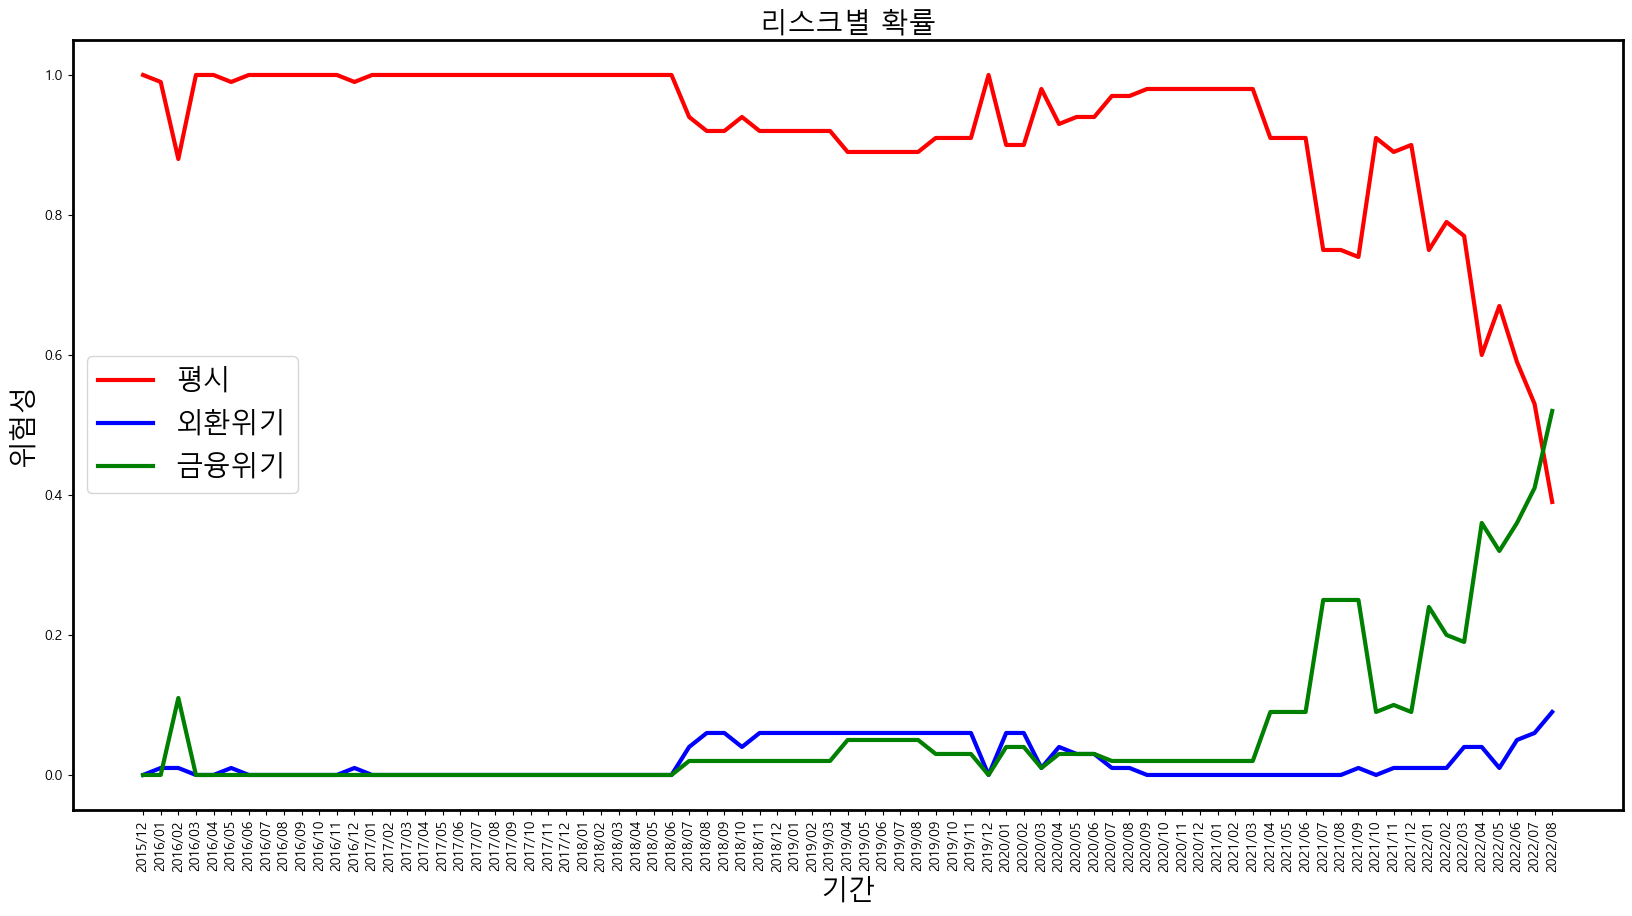

In [42]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=df_prob, x='연월', y='평시', c='r', errorbar=None, legend=True)
sns.lineplot(data=df_prob, x='연월', y='외환위기 리스크', c='b', errorbar=None, legend=True)
sns.lineplot(data=df_prob, x='연월', y='금융위기 리스크', c='g', errorbar=None, legend=True)

plt.title('리스크별 확률', fontsize=20)
plt.xlabel('기간', fontsize=20)
plt.ylabel('위험성', fontsize=20)
plt.legend(['평시', '외환위기', '금융위기'], fontsize=20, loc='best')
plt.xticks(rotation=90)
plt.show()

### → 가장 최근(2022년 8월 데이터)으로 갈수록 2(금융위기)의 확률이 급격하게 증가하고 있음을 알 수 있음
### → 외환위기보다는 2008년 금융위기와 유사한 상황이 될 위험성이 높음
### → 금융위기 리스크가 시간이 지날수록 증가하는 추세를 보이기 때문에 단기적인 위기라고 속단하기에는 무리가 있음

### - 회귀분석 결과에 영향을 준 지표들

In [43]:
# 그리드 서치
from sklearn.model_selection import GridSearchCV
param_grid = {'random_state' : range(1, 50, 1)}
gridsearch = GridSearchCV(RandomForestClassifier(), param_grid, scoring='accuracy', return_train_score=True, cv=5)
gridsearch.fit(x_train, y_train)

print('최적의 파라미터 : ', gridsearch.best_params_)
print('최적의 정확도 : ', gridsearch.best_score_)

최적의 파라미터 :  {'random_state': 4}
최적의 정확도 :  0.7309803921568628


In [44]:
# 중요 feature
# df_regression 컬럼에서 날짜 컬럼과 class 컬럼 제외
df_columns = list(df_regression.columns)[2:-1]

best = gridsearch.best_estimator_
a = best.feature_importances_
b = df_columns

feature_df = pd.DataFrame(data=a, index=b)
feature_df.columns = ['feature_importance']
feature_df = feature_df.sort_values(by='feature_importance', ascending=False)
feature_df_10 = feature_df.iloc[:10, :]
feature_df_10

,feature_importance
단기외채(달러),0.112541
한국_금리(%),0.108853
한국(KOSPI)(1980.1.4=100),0.090093
한국_외환보유액(달러),0.087448
원/미국달러(매매기준율),0.086395
외채비율(%),0.078769
원/위안(매매기준율),0.071757
단기외채/외환보유액,0.068819
일본_금리(%),0.061361
미국장단기(국채)금리차,0.050469


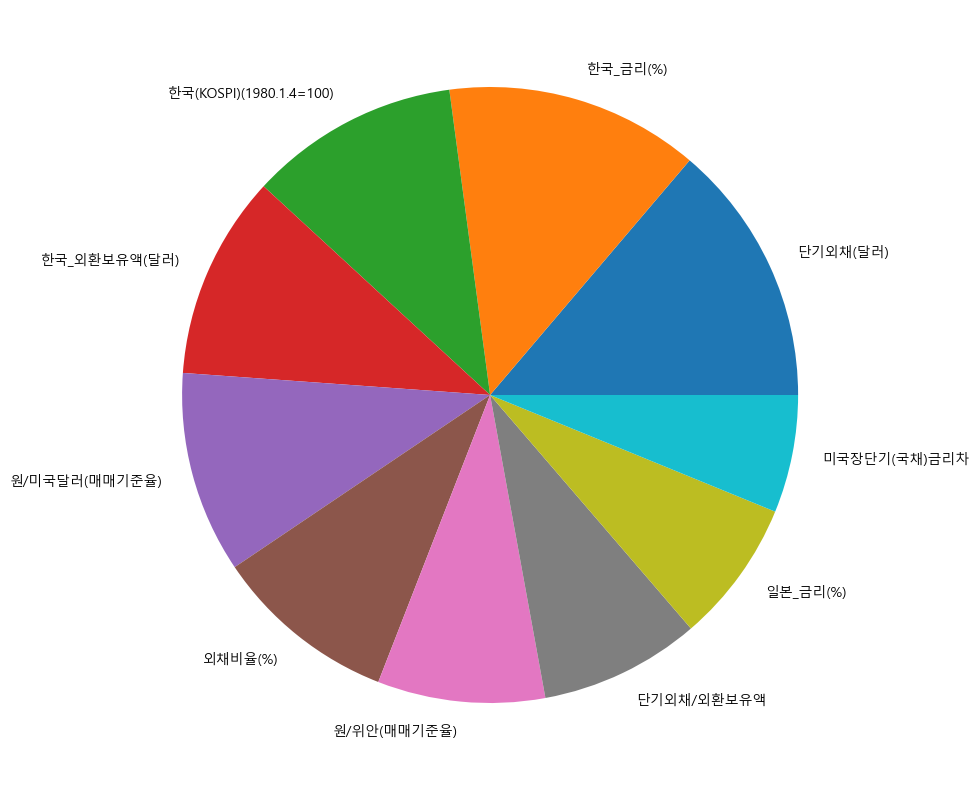

In [45]:
# 중요 feature 시각화
plt.pie(feature_df_10.feature_importance, labels=feature_df_10.index)
plt.show()

### → 분석을 시작 할 때 주요 지표로 선정한 지표 : 금리, 환율, 경상수지, 외환보유액, 단기외채
### → 분석에 사용한 주요 지표와 회귀분석 결과에 영향을 미친 지표들이 상당 부분 일치하는 결과를 보임

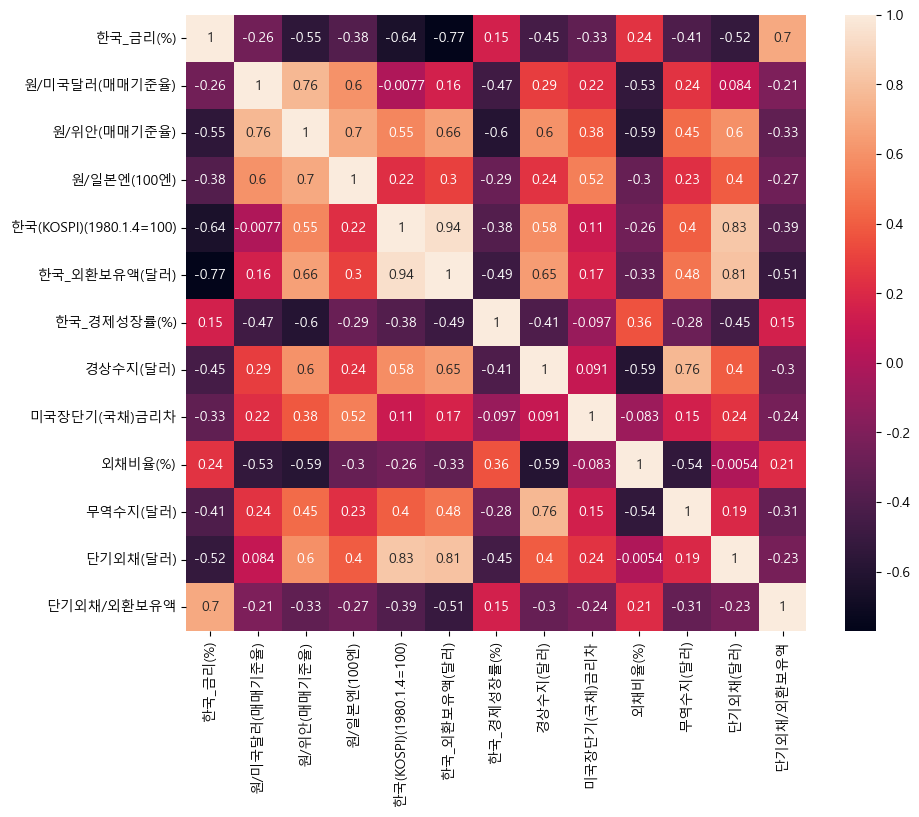

In [46]:
# 상관관계 분석 히트맵
df_corr = df_regression.iloc[:, 5:-1]
df_corr = df_corr.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(df_corr, annot=True)
plt.show()